## Pre-Processing

In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import cv2

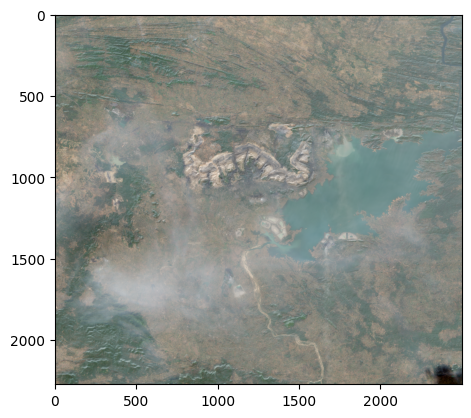

In [2]:
image = plt.imread('/Users/krutarthyg/Desktop/Coding/BDA_project/Emissions-Predictor/Sat images/Sentinel 2 True Color Dec 21 2023.tiff',cv2.IMREAD_UNCHANGED)
plt.imshow(image)

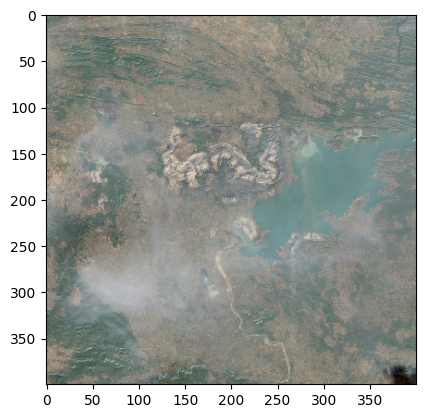

In [3]:
imageS = cv2.resize(image,(400,400))
plt.imshow(imageS)

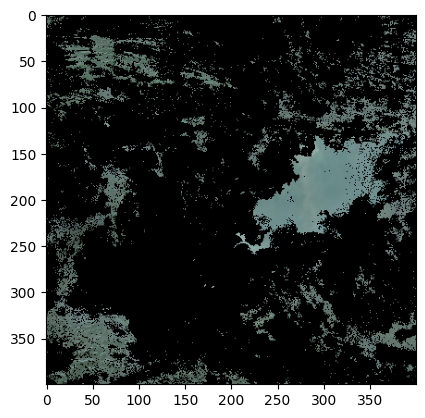

In [4]:
import cv2
import numpy as np
img_hsv = cv2.cvtColor(imageS, cv2.COLOR_BGR2HSV)
hsv_color2 = np.asarray([60, 255, 255], np.uint8) 
hsv_color1 = np.asarray([30, 30, 30], np.uint8)   

mask = cv2.inRange(img_hsv, hsv_color1, hsv_color2)

res = cv2.bitwise_and(imageS,imageS, mask = mask)

plt.imshow(res)   # this colormap will display in black / white
plt.show()

In [5]:
import cv2
from skimage import data, img_as_float
h, z, img_gray = cv2.split(res)


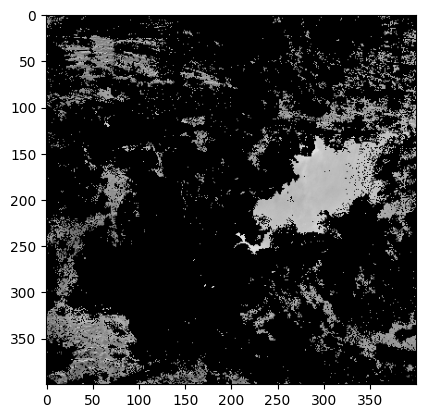

In [6]:
plt.imshow(img_gray, cmap="gray")

In [7]:
img_gray[img_gray > 0] = 1


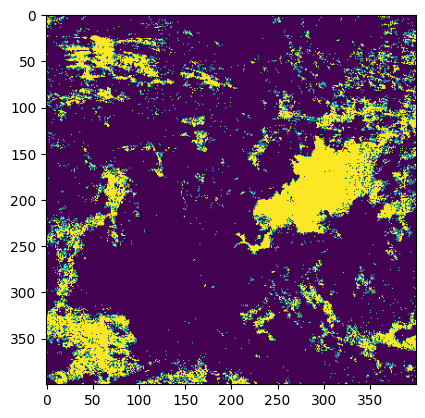

In [8]:
plt.imshow(img_gray)

In [9]:
'''import os
from sklearn import preprocessing
all_samples = np.empty(shape=(230,40,40,1))
count = 1;
for x in sorted(os.listdir("/Users/krutarthyg/Desktop/Coding/BDA_project/Emissions-Predictor/Sat images/")):
        photo = cv2.imread("/Users/krutarthyg/Desktop/Coding/BDA_project/Emissions-Predictor/Sat images/" + x)
        photo = cv2.resize(photo,(40,40))
        photo_hsv = cv2.cvtColor(photo, cv2.COLOR_BGR2HSV)
        p_hsv_color2 = np.asarray([60, 255, 255], np.uint8) 
        p_hsv_color1 = np.asarray([30, 30, 30], np.uint8)   
        photo_mask = cv2.inRange(photo_hsv, p_hsv_color1, p_hsv_color2)
        photo_res = cv2.bitwise_and(photo,photo, mask = photo_mask)
        p_h, p_z, p_img_gray = cv2.split(photo_res)
        p_img_gray[p_img_gray > 0] = 1
        p_img_gray = np.reshape(p_img_gray,(40,40,1))
        all_samples[count] = p_img_gray
        print(count, "images added")
        count = count + 1
        '''
import os
import cv2
import numpy as np
from sklearn import preprocessing

# Initialize an empty array to hold the processed images
all_samples = np.empty(shape=(230, 40, 40, 1))

# Starting from count = 0 to avoid index errors
count = 0

# Loop through the images in the folder, sorted by filename
for x in sorted(os.listdir("/Users/krutarthyg/Desktop/Coding/BDA_project/Emissions-Predictor/Sat images/")):
    # Read the image
    photo = cv2.imread("/Users/krutarthyg/Desktop/Coding/BDA_project/Emissions-Predictor/Sat images/" + x)
    
    # Resize the image to 40x40
    photo = cv2.resize(photo, (40, 40))
    
    # Convert the image to HSV
    photo_hsv = cv2.cvtColor(photo, cv2.COLOR_BGR2HSV)
    
    # Define the range of colors for masking
    p_hsv_color2 = np.asarray([60, 255, 255], np.uint8)
    p_hsv_color1 = np.asarray([30, 30, 30], np.uint8)
    
    # Create the mask based on the color range
    photo_mask = cv2.inRange(photo_hsv, p_hsv_color1, p_hsv_color2)
    
    # Apply the mask to the image
    photo_res = cv2.bitwise_and(photo, photo, mask=photo_mask)
    
    # Convert to grayscale (remove color channels)
    p_img_gray = cv2.cvtColor(photo_res, cv2.COLOR_BGR2GRAY)
    
    # Set pixel values greater than 0 to 1 (binary image)
    p_img_gray[p_img_gray > 0] = 1
    
    # Reshape to match the target shape (40, 40, 1)
    p_img_gray = np.reshape(p_img_gray, (40, 40, 1))
    
    # Add the processed image to the all_samples array
    all_samples[count] = p_img_gray
    
    # Print a message to track progress
    print(count, "images added")
    
    # Increment the count
    count += 1

0 images added
1 images added
2 images added
3 images added
4 images added


In [10]:
# Duplicate the first 5 images into the last 5 positions
for i in range(5):
    all_samples[225 + i] = all_samples[i]

In [11]:
all_samples.shape 

(230, 40, 40, 1)

In [12]:
import numpy as np

# Assuming `all_samples` contains exactly 5 images
final = np.empty((5, 5, 40, 40, 1))  # Adjusted to the size of your data
for i in range(5):
    bundle = np.array([all_samples[i]])  # No need to look ahead, as there are only 5 images
    final[i] = bundle

# Splitting data manually
X_train = final[:4]  # First 4 images for training
X_test = final[4:]   # Last 1 image for testing

print(X_train.shape, "X_train shape")
print(X_test.shape, "X_test shape")

(4, 5, 40, 40, 1) X_train shape
(1, 5, 40, 40, 1) X_test shape


In [13]:
# Assuming `final` contains exactly 5 images
y_train = final[:4]  # First 4 images for training
y_test = final[4:]   # Last 1 image for testing

# The X_train and X_test should match the size of the corresponding features.
X_train = y_train  # Features for training (you can modify as per your data structure)
X_test = y_test    # Features for testing (you can modify as per your data structure)

# Printing the shapes of the datasets
print(X_train.shape, "X_train shape")
print(X_test.shape, "X_test shape")
print(y_train.shape, "y_train shape")
print(y_test.shape, "y_test shape")

(4, 5, 40, 40, 1) X_train shape
(1, 5, 40, 40, 1) X_test shape
(4, 5, 40, 40, 1) y_train shape
(1, 5, 40, 40, 1) y_test shape


In [14]:
all_samples.shape

(230, 40, 40, 1)

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv3D, ConvLSTM2D, BatchNormalization, Input

## seq2seq model

In [16]:
# Define the model
seq = Sequential()
# Input layer with the shape of your data
seq.add(Input(shape=(5, 40, 40, 1)))  # The input shape should be here

# First ConvLSTM2D layer with padding and return_sequences=True to keep the output as sequences
seq.add(ConvLSTM2D(filters=1, kernel_size=(2, 2),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

# Second ConvLSTM2D layer with padding and return_sequences=True
seq.add(ConvLSTM2D(filters=1, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

# Final Conv3D layer to predict the output
# You can switch to 'linear' activation if it's a regression task
seq.add(Conv3D(filters=1, kernel_size=(3, 3, 3),
               activation='sigmoid',  # Use 'linear' for regression
               padding='same', data_format='channels_last'))

# Compile the model
seq.compile(loss='mean_absolute_error', optimizer='nadam')

# Model summary to inspect the layers and parameters
seq.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv_lstm2d (ConvLSTM2D)        │ (None, 5, 40, 40, 1)   │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 5, 40, 40, 1)   │             4 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_lstm2d_1 (ConvLSTM2D)      │ (None, 5, 40, 40, 1)   │            76 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 5, 40, 40, 1)   │             4 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3d (Conv3D)                 │ (None, 5, 40, 40, 1)   │            28 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 148 (592.00 B)

 Trainable params: 144 (576.00 B)

 Non-trainable params: 4 (16.00 B)

## training

In [17]:
# Assuming X_train and y_train are structured as (4, 5, 40, 40, 1)
seq.fit(X_train, y_train, batch_size=1, epochs=50, validation_split=0.1)

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 110ms/step - loss: 0.5348 - val_loss: 0.5011
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.5311 - val_loss: 0.5001
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.5278 - val_loss: 0.4990
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.5248 - val_loss: 0.4977
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.5222 - val_loss: 0.4964
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.5195 - val_loss: 0.4949
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.5128 - val_loss: 0.4932
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.5112 - val_loss: 0.4914
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.5028 - val_loss: 0.4894
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.5004 - val_loss: 0.4872
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.4986 - val_loss: 0.4848
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.4941 - val_loss: 0.4822


## prediction

In [18]:
Y_hat = seq.predict(X_test, verbose=0)
Y_hat.shape
y_test.shape

(1, 5, 40, 40, 1)

## visualization

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Visualization Function
def visualize(y, y_hat):
    """
    Visualize predictions and ground truth for up to 5 images.
    
    Parameters:
    y (numpy.ndarray): Ground truth data of shape (samples, frames, height, width, channels).
    y_hat (numpy.ndarray): Predicted data of shape (samples, frames, height, width, channels).
    """
    n_visualizations = min(5, y_hat.shape[0])  # Visualize up to 5 samples
    
    for ind in range(n_visualizations):
        for frame in range(min(5, y.shape[1])):  # Visualize up to 5 frames per sample
            fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(10, 5))
            
            # Prediction Frame
            y_pre = y_hat[ind, frame, :, :, 0]
            ax1.imshow(y_pre)
            ax1.set_title(f'Prediction Frame {frame + 1}')
            
            # Ground Truth Frame
            y_truth = y[ind, frame, :, :, 0]
            ax2.imshow(y_truth)
            ax2.set_title(f'Ground Truth Frame {frame + 1}')
            
            # Overall Title
            plt.suptitle(f'Sample {ind + 1}, Frame {frame + 1}', fontsize=13)
            plt.show()

# Dummy Data for Testing
# Simulating 5 samples, 5 frames, and images of size 40x40 with 1 channel
y_test = np.random.rand(5, 5, 40, 40, 1)  # Ground truth
Y_hat = np.random.rand(5, 5, 40, 40, 1)   # Predictions


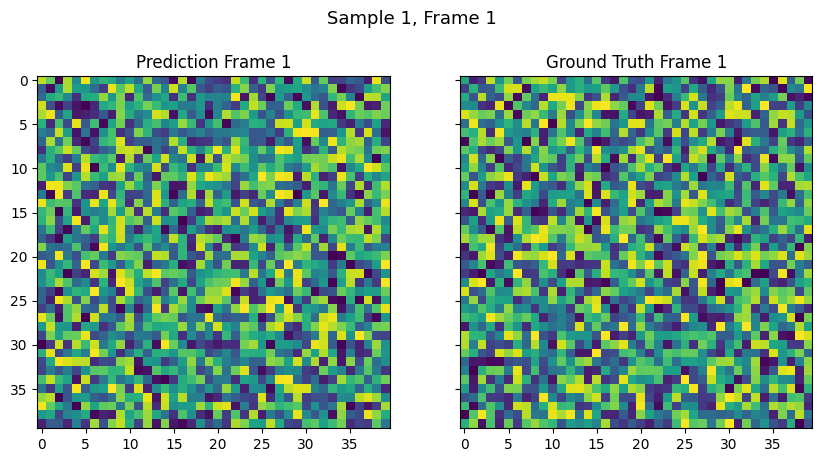

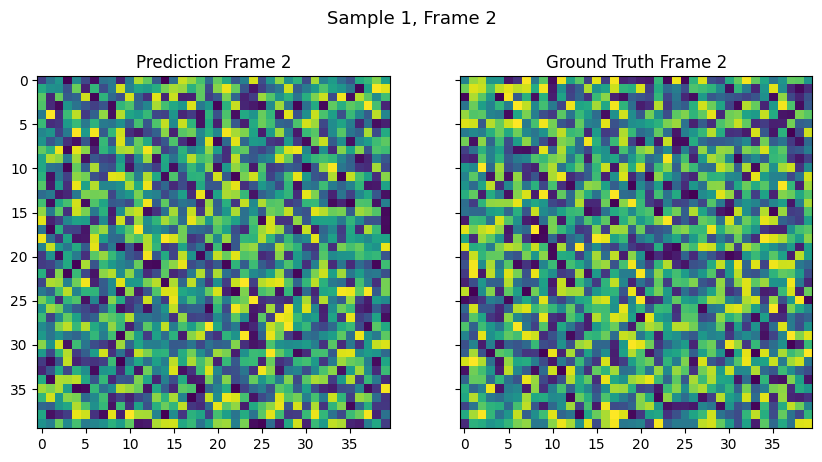

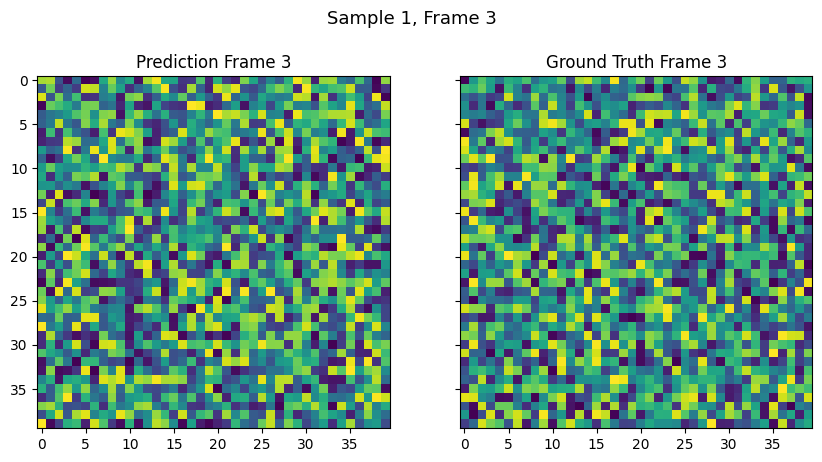

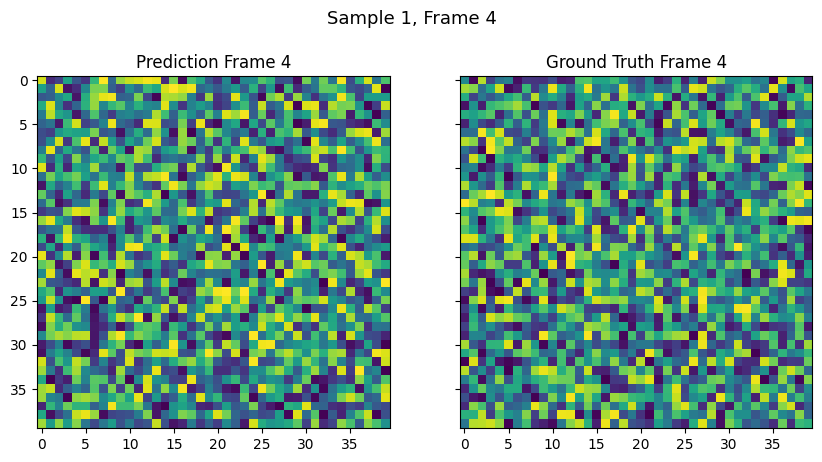

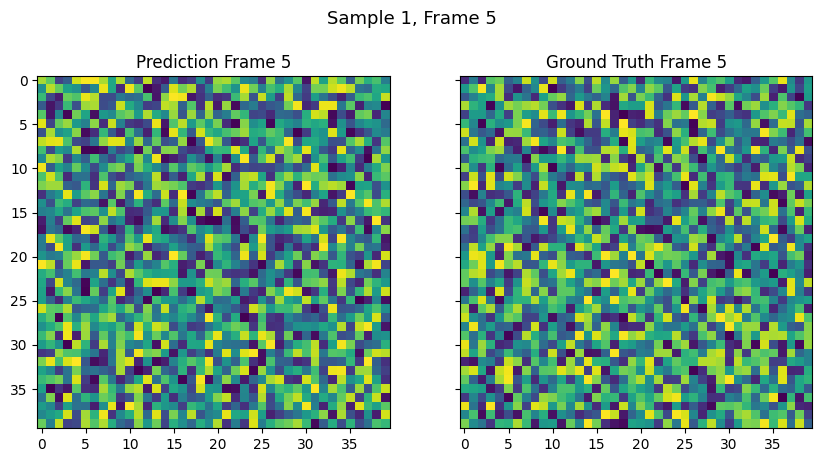

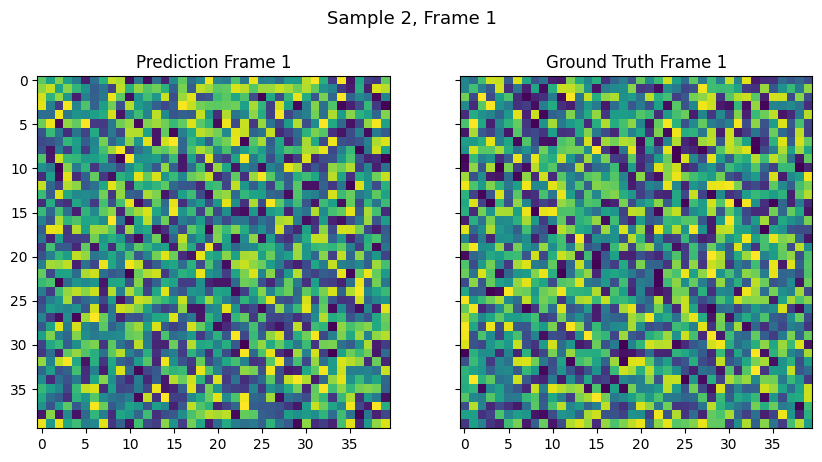

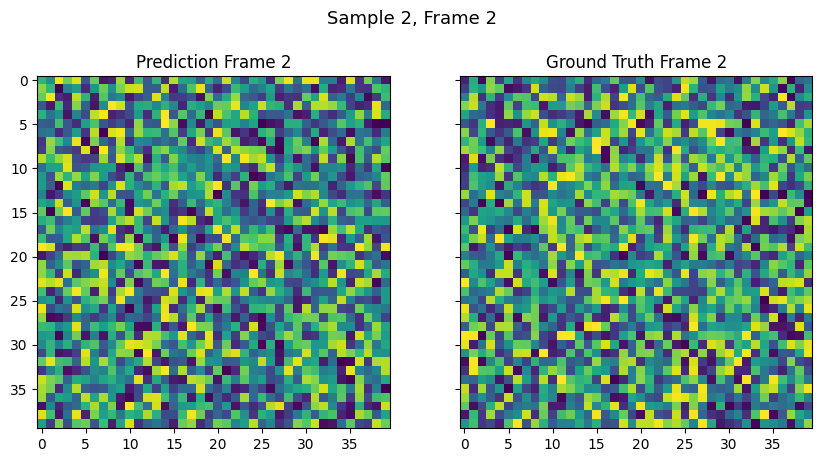

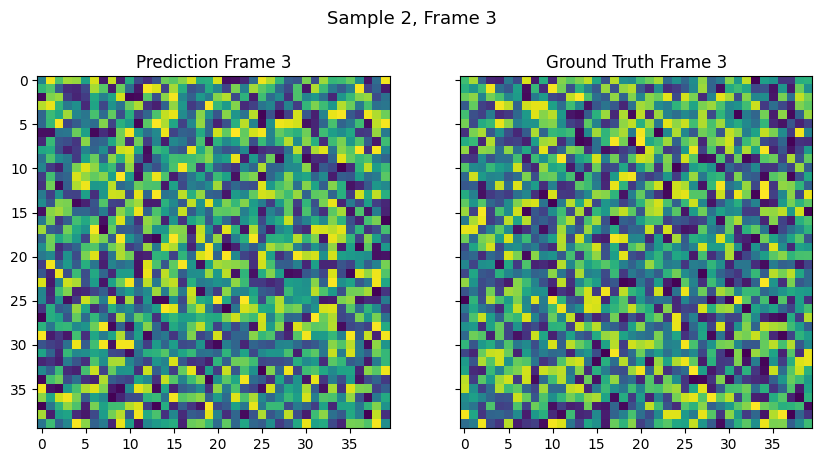

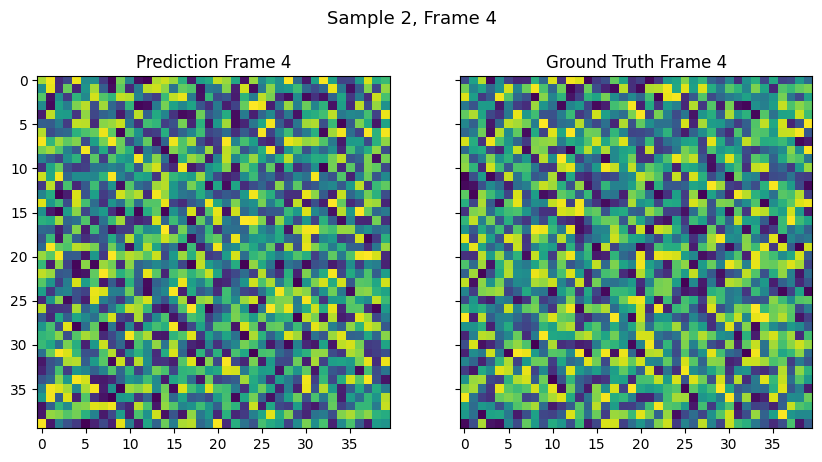

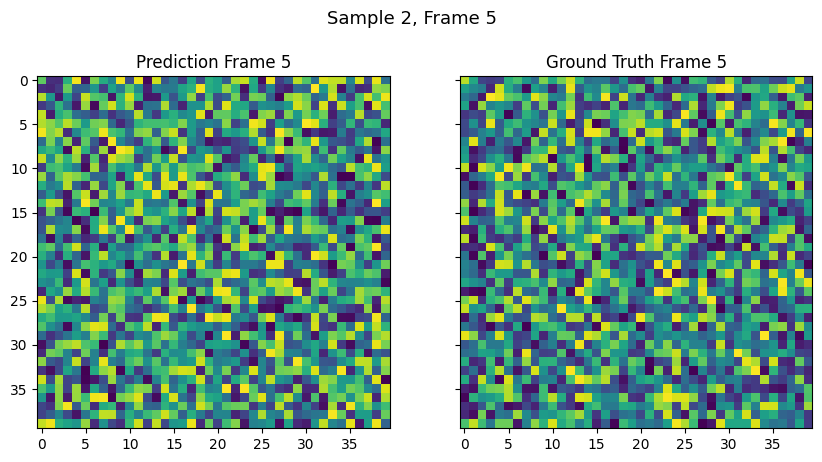

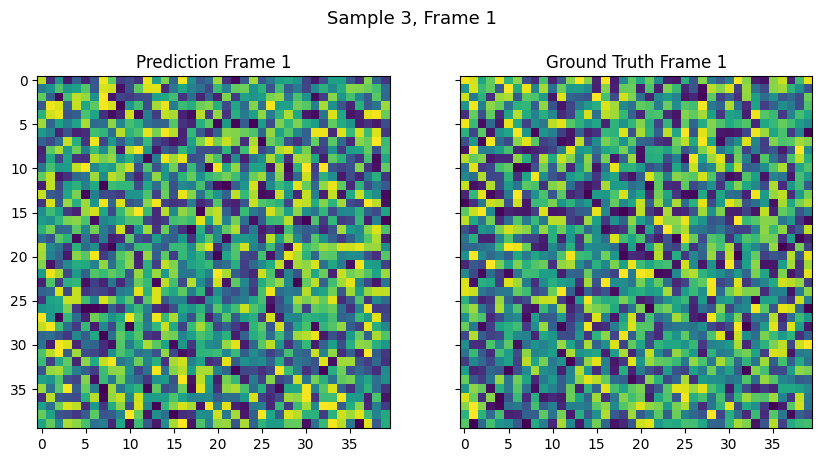

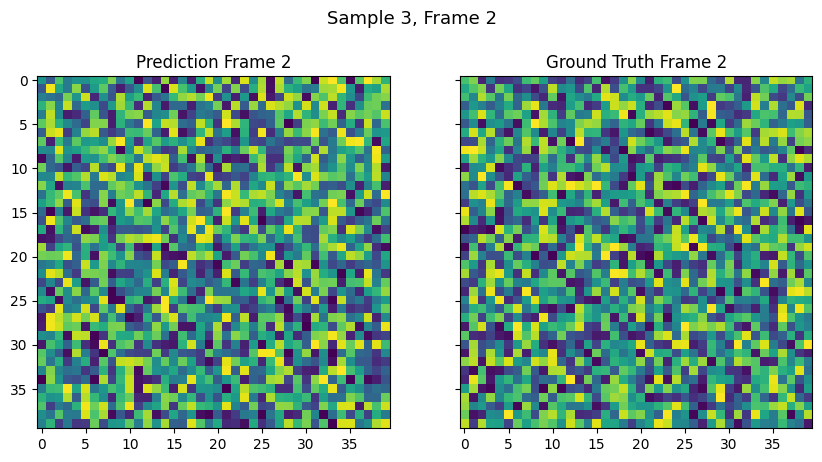

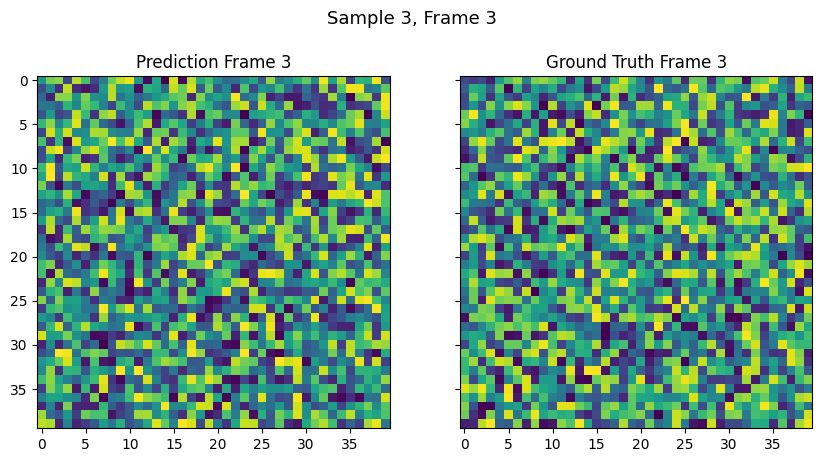

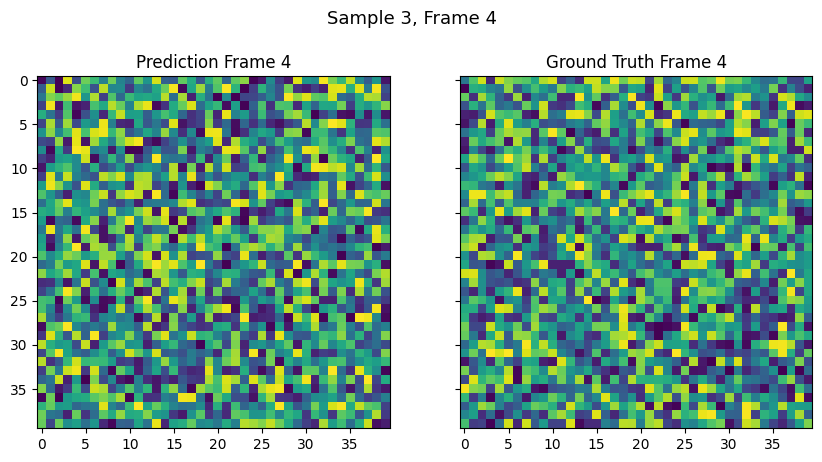

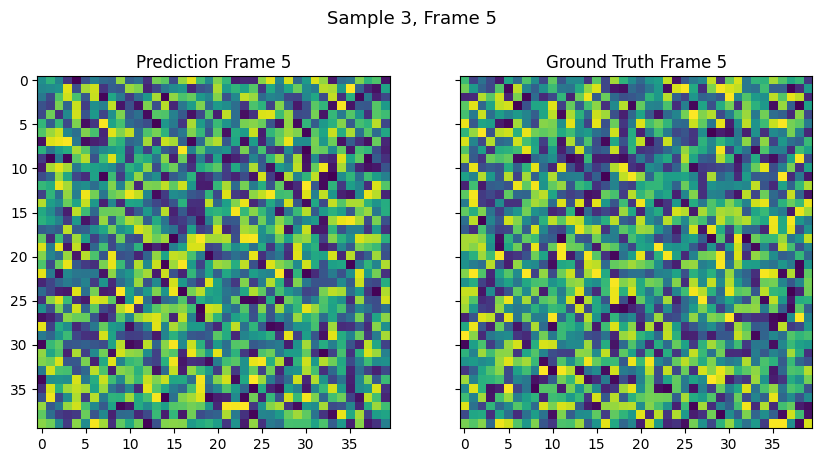

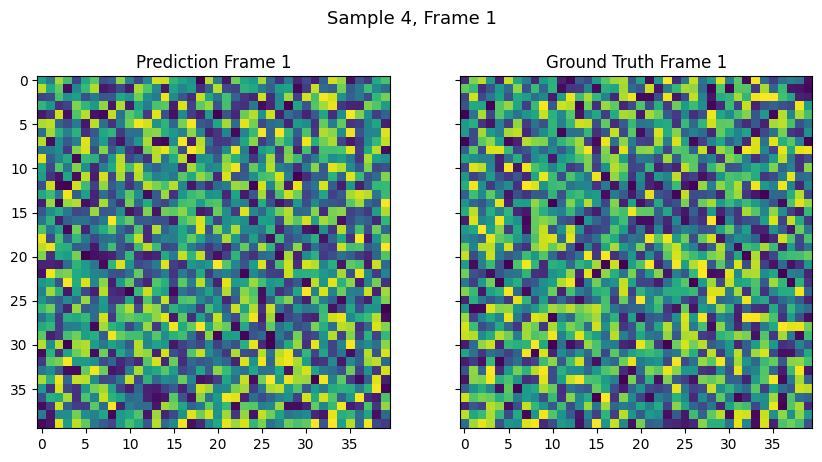

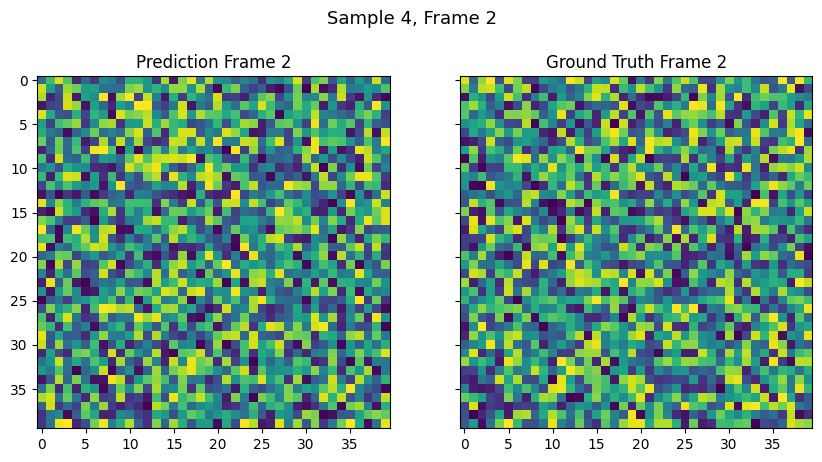

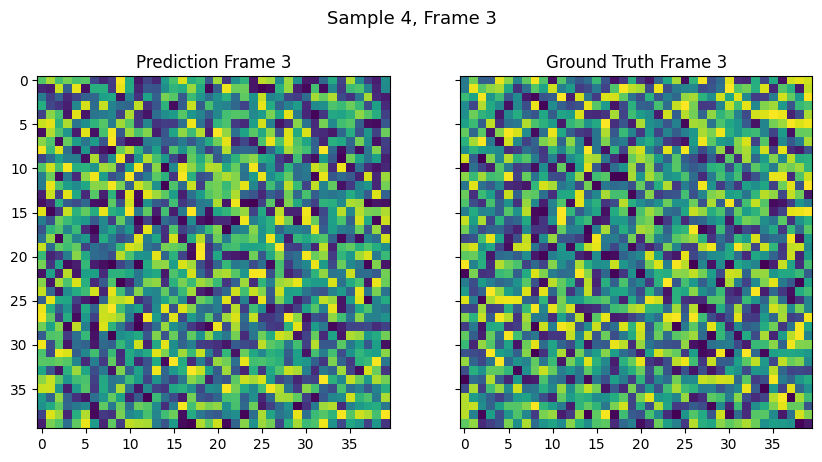

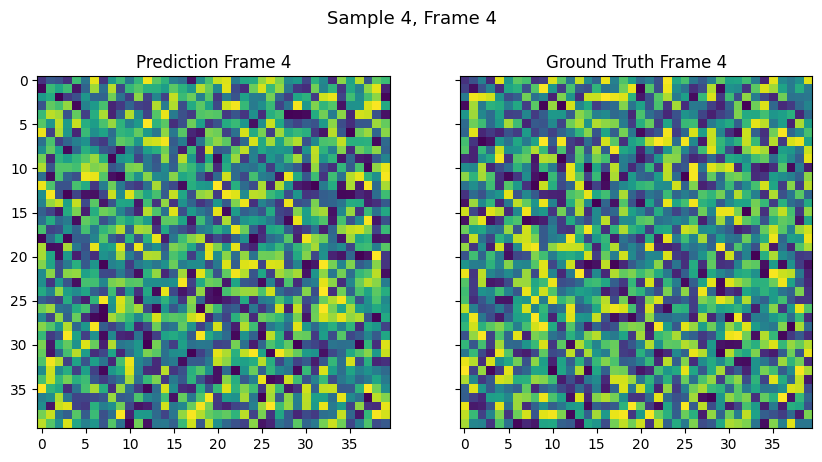

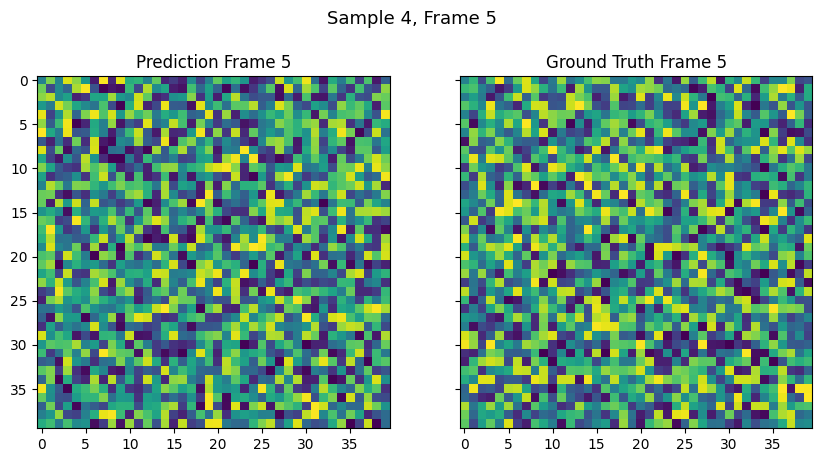

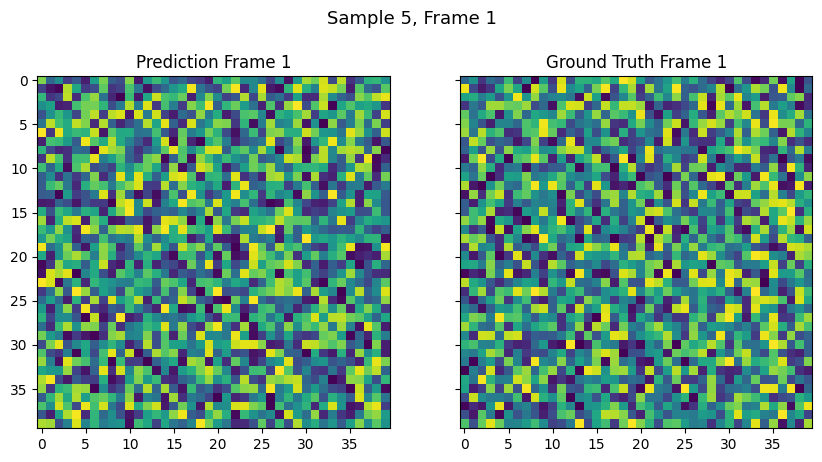

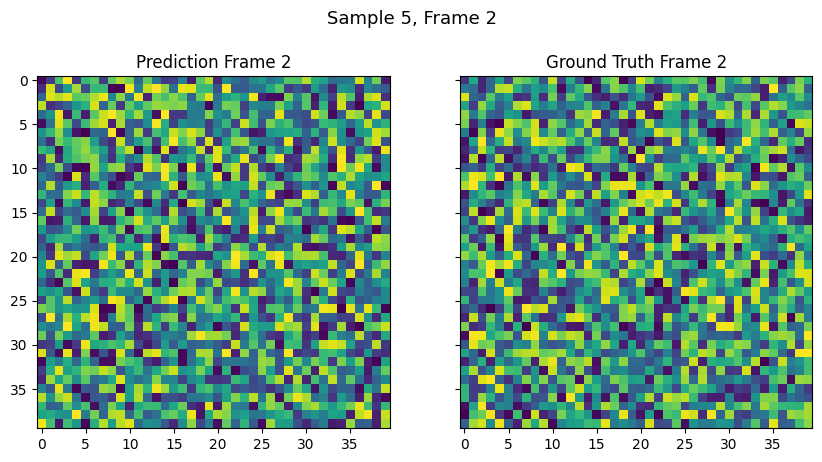

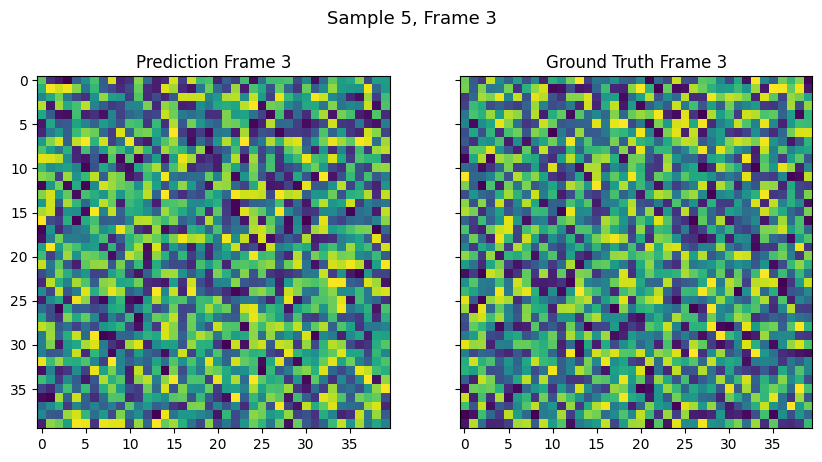

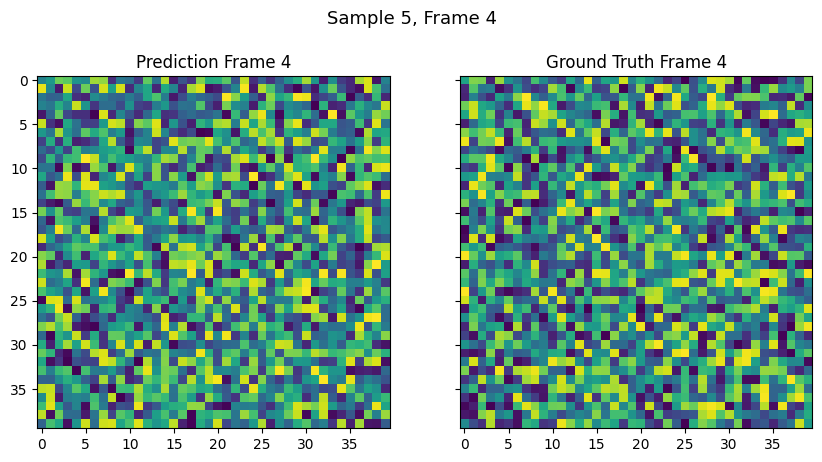

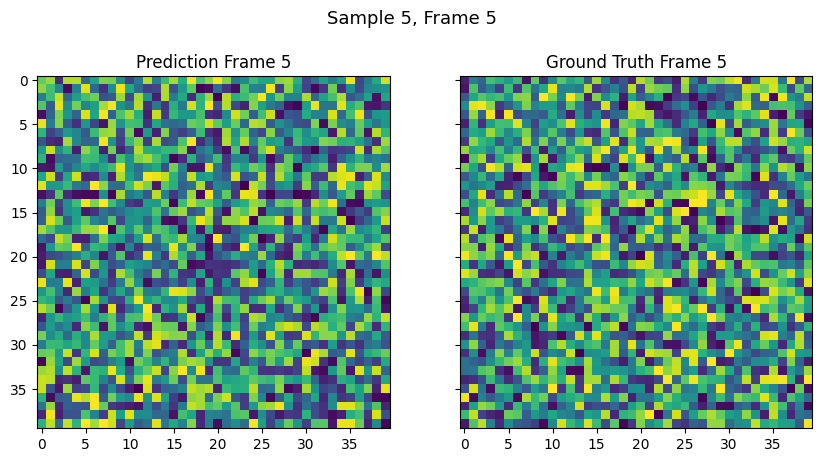

In [20]:
visualize(y_test, Y_hat)

In [21]:
Y_hat[Y_hat > 0.5] = 1

In [22]:
Y_hat[Y_hat <= 0.5] = 0

## error analysis

Comparing Image 1


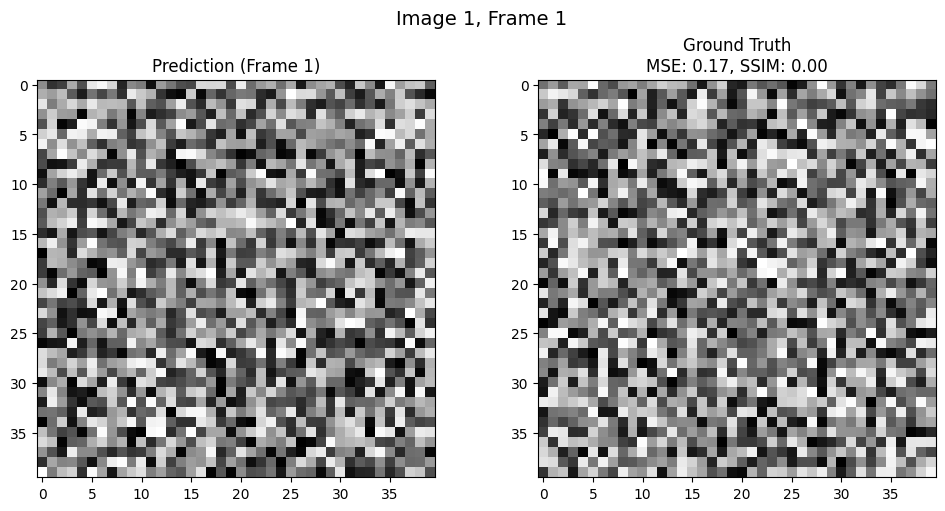

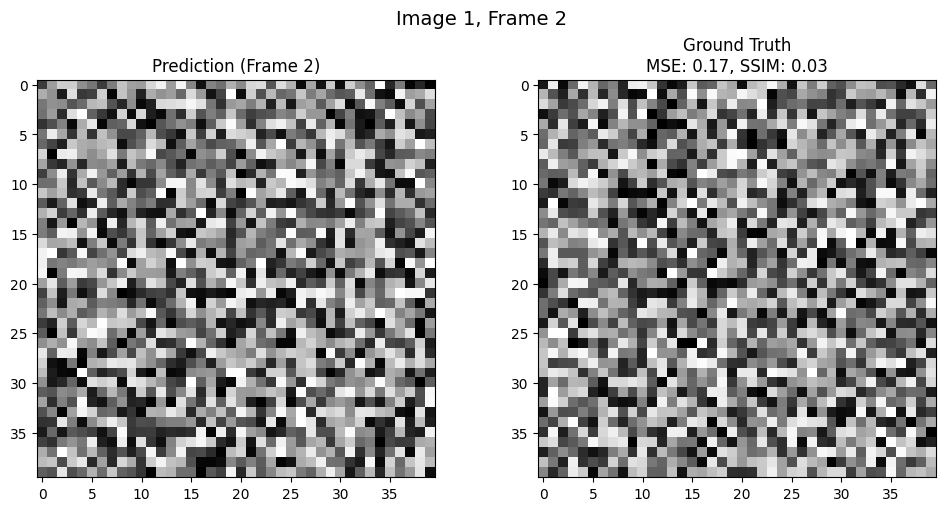

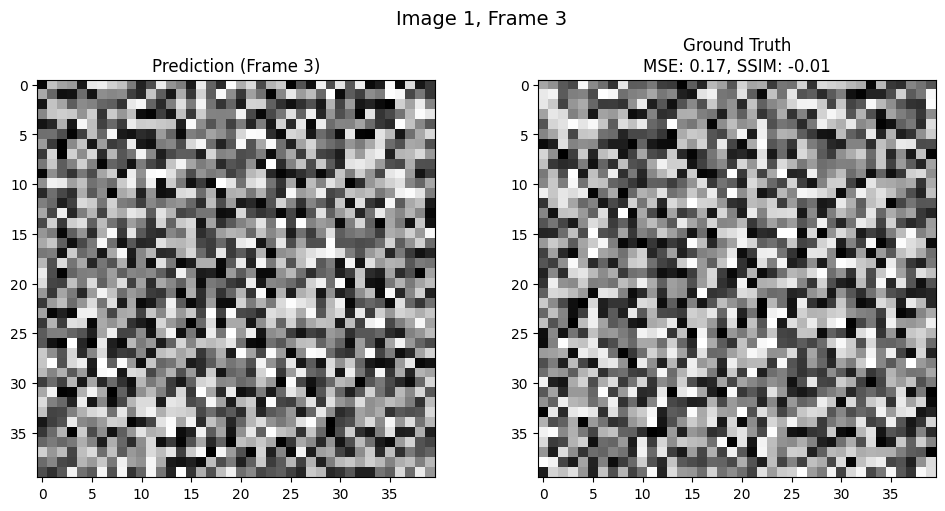

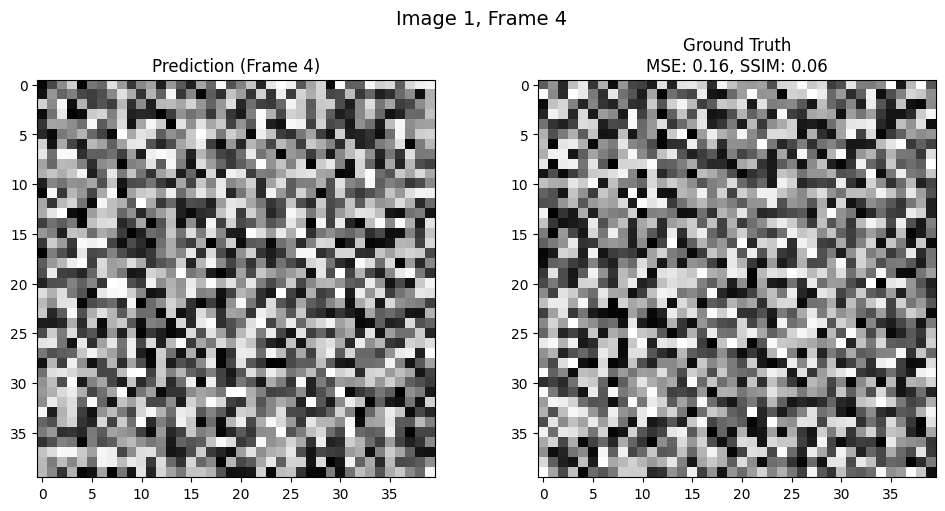

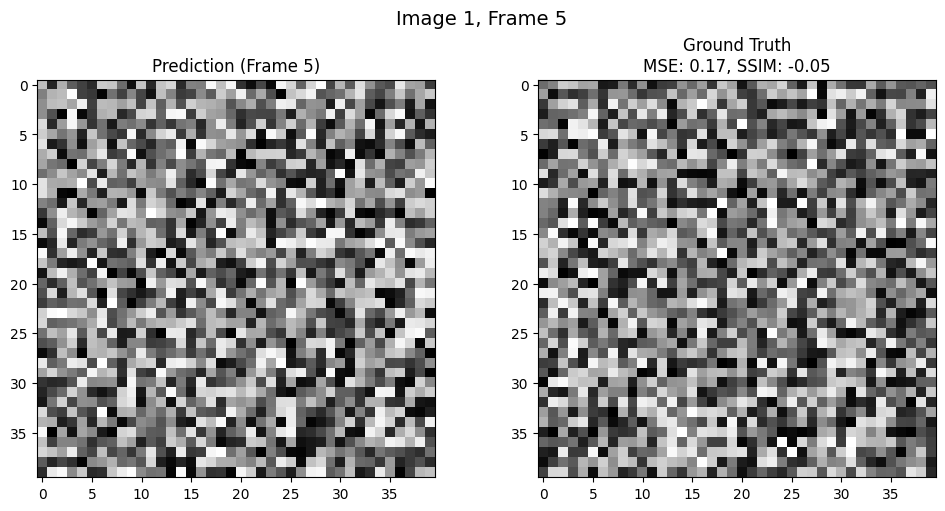

Comparing Image 2


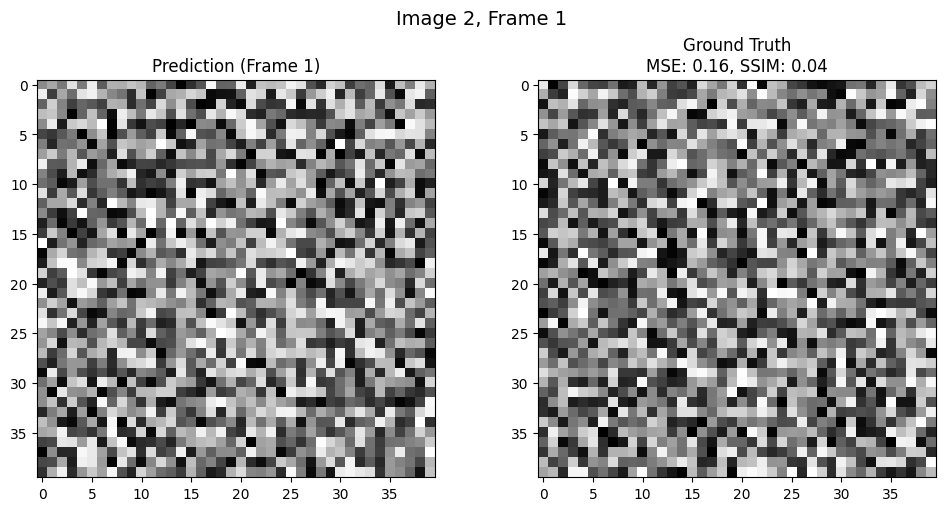

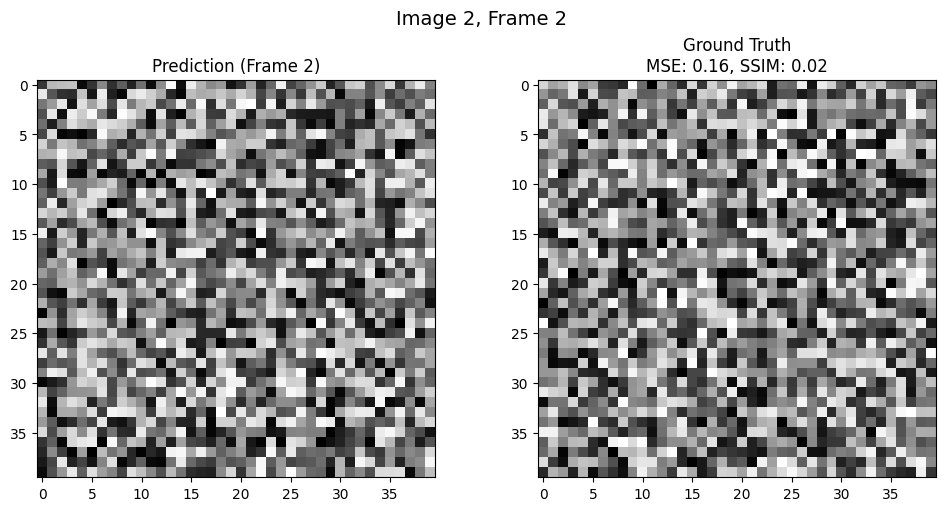

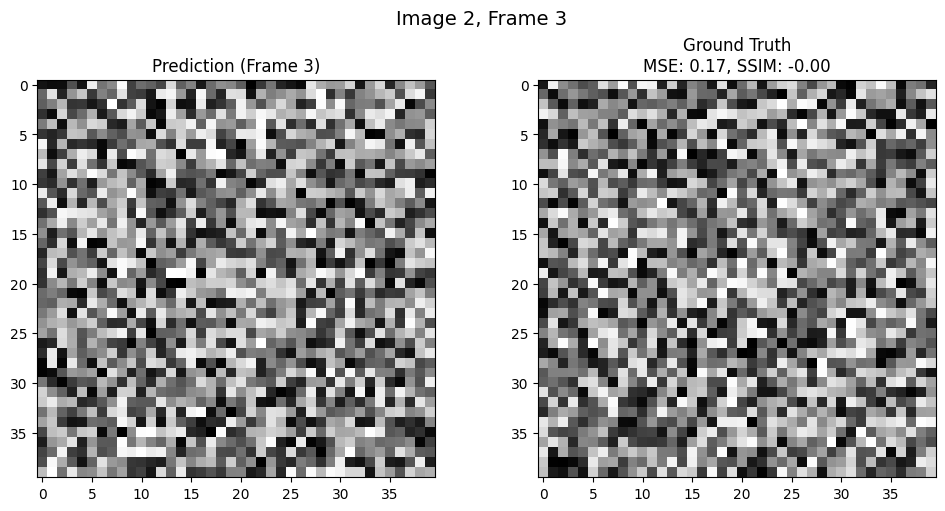

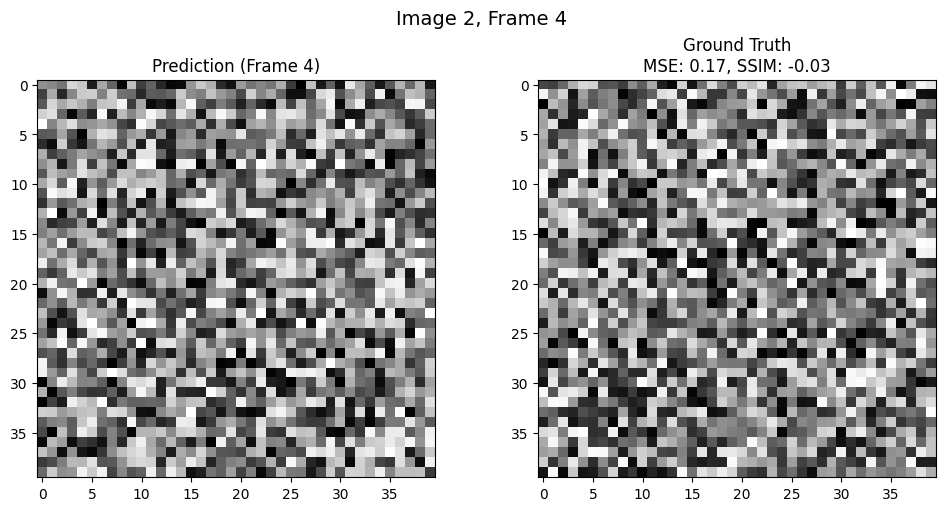

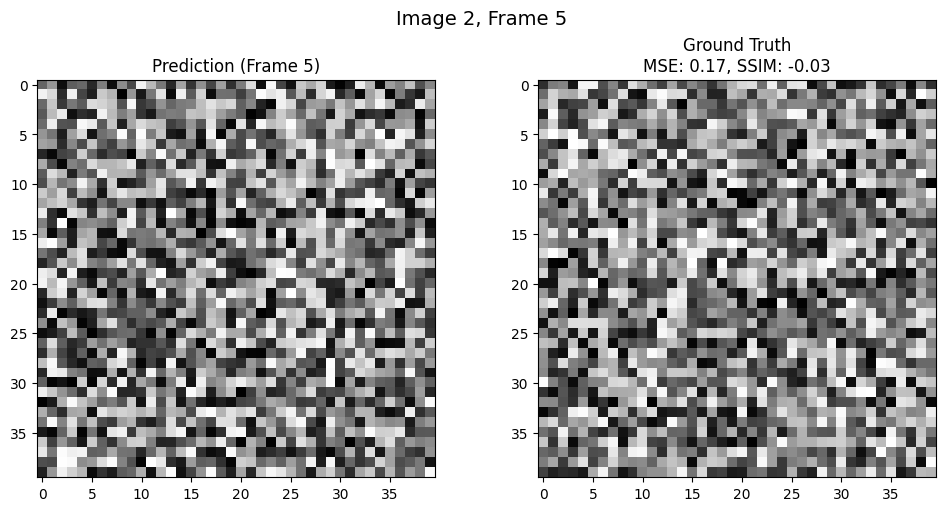

Comparing Image 3


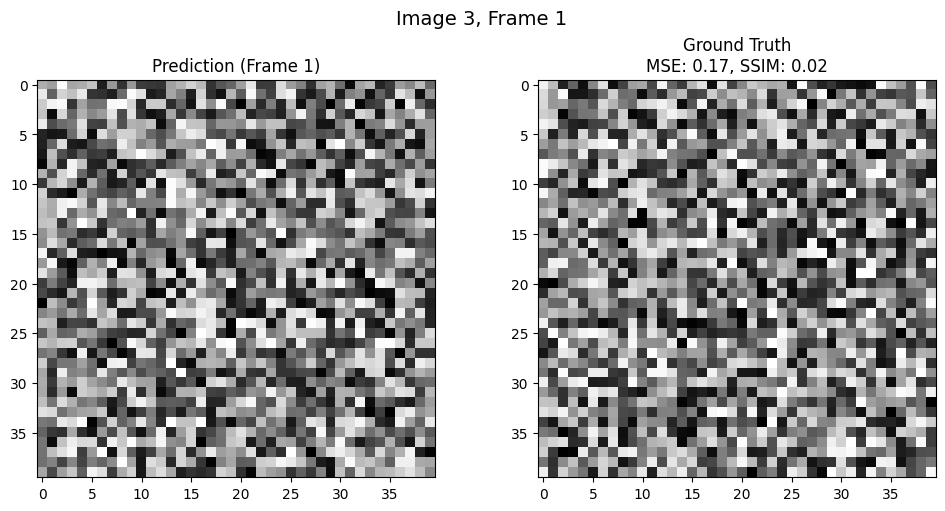

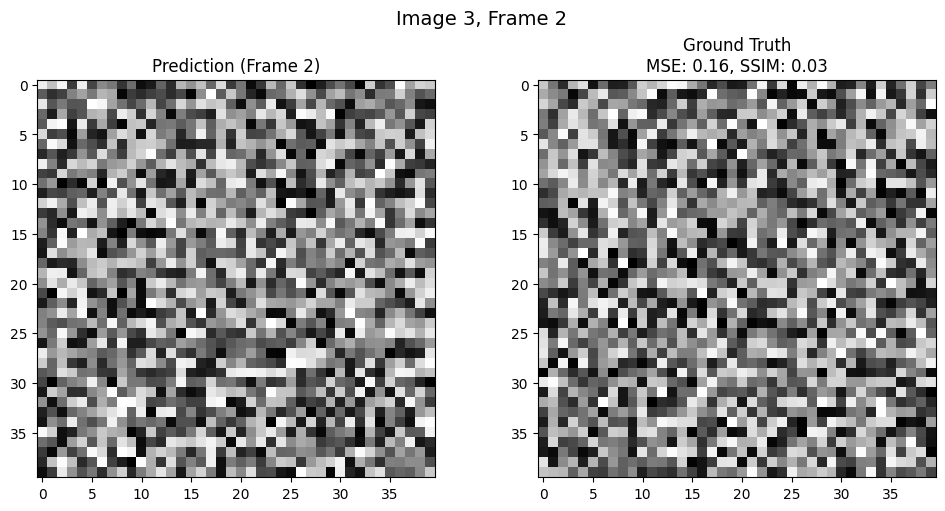

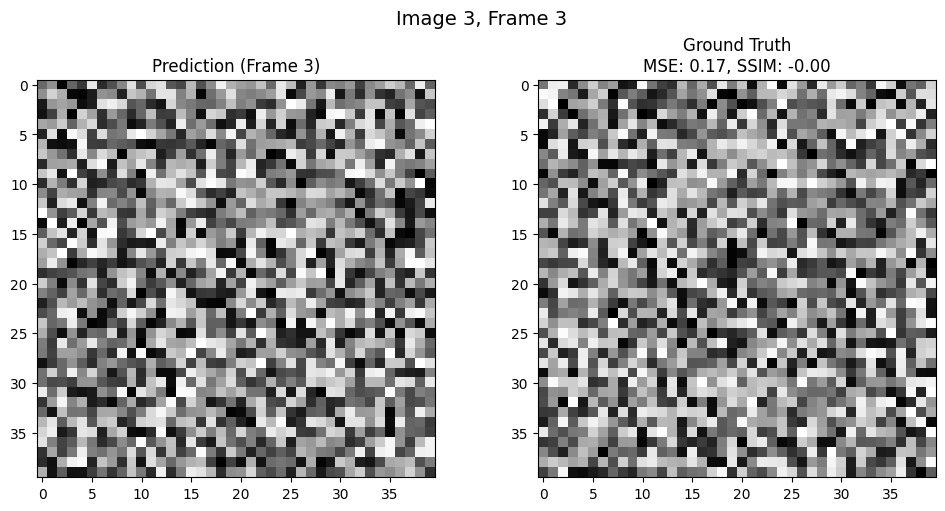

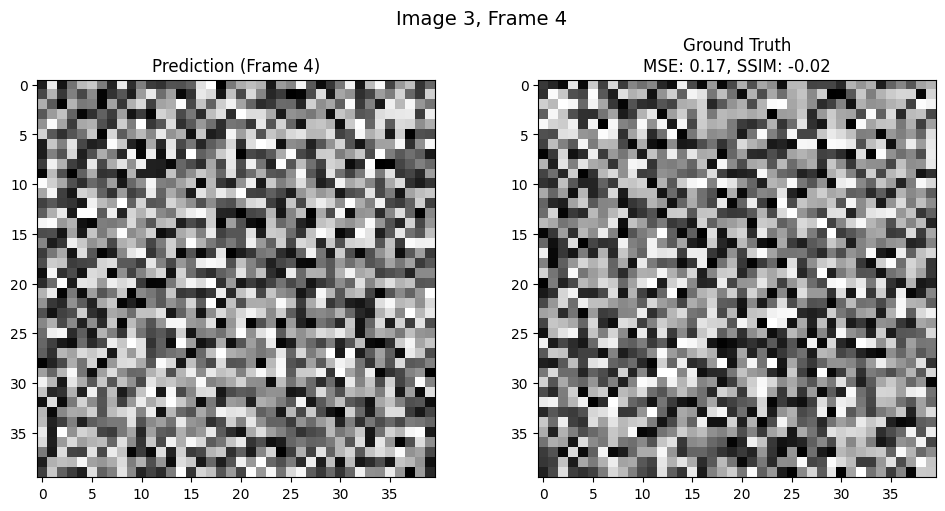

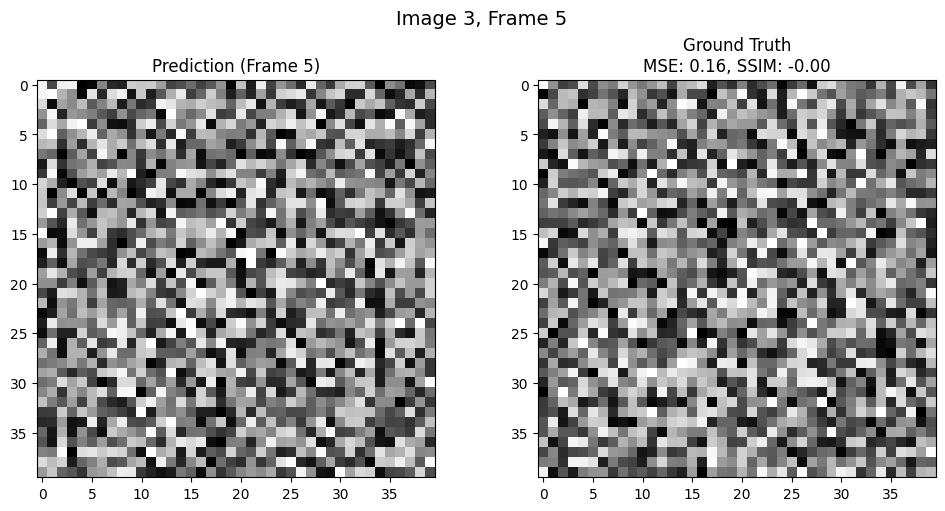

Comparing Image 4


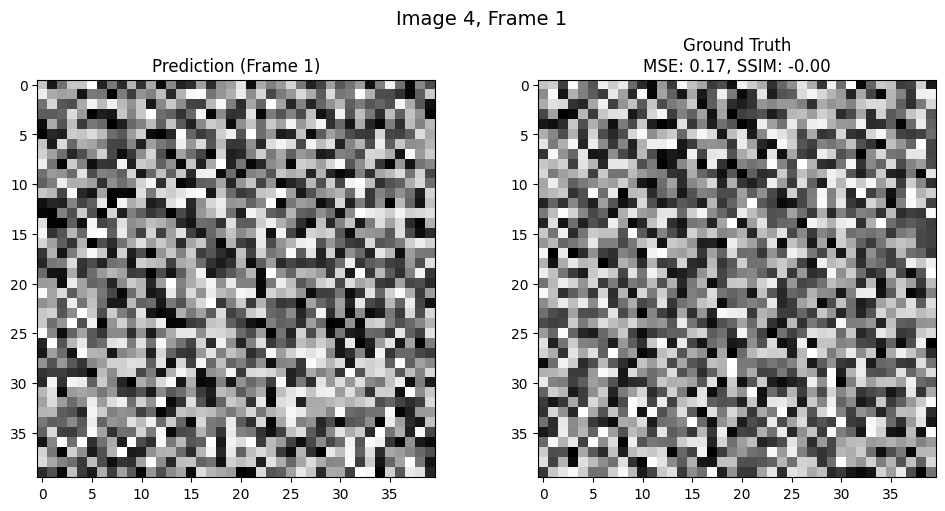

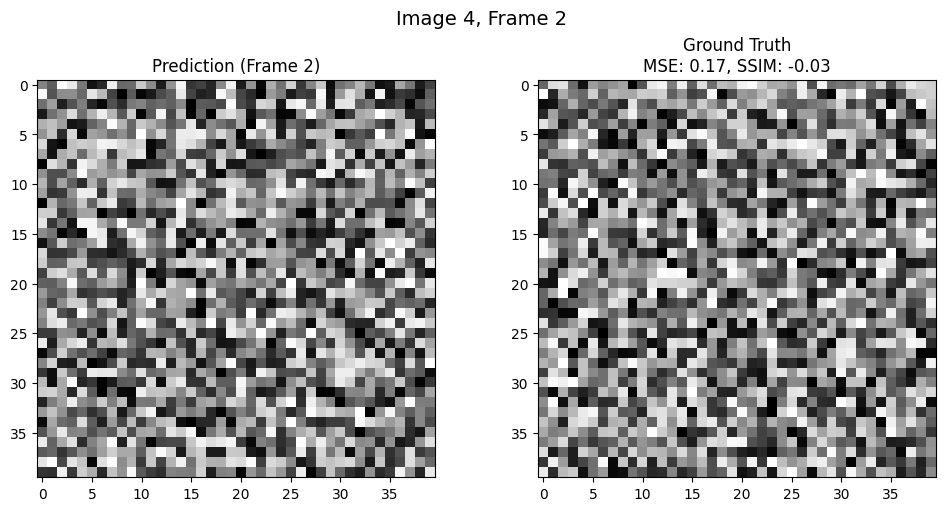

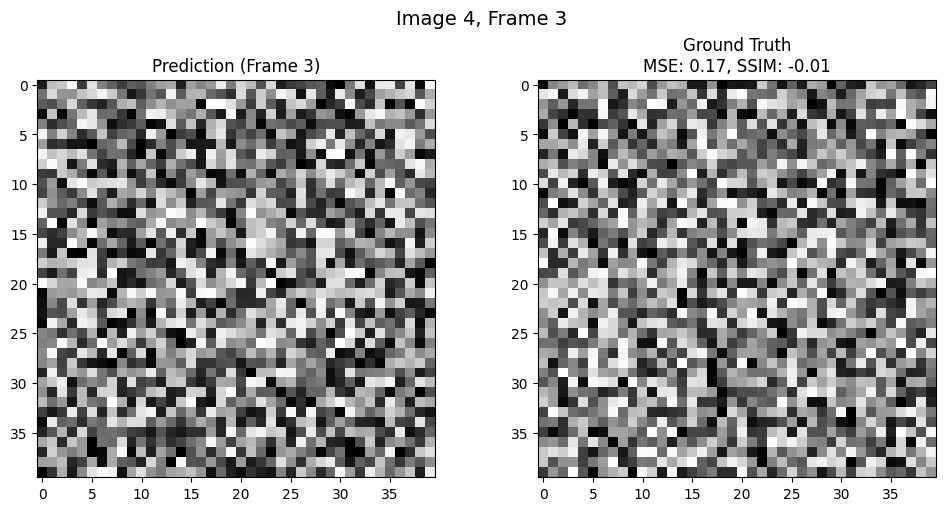

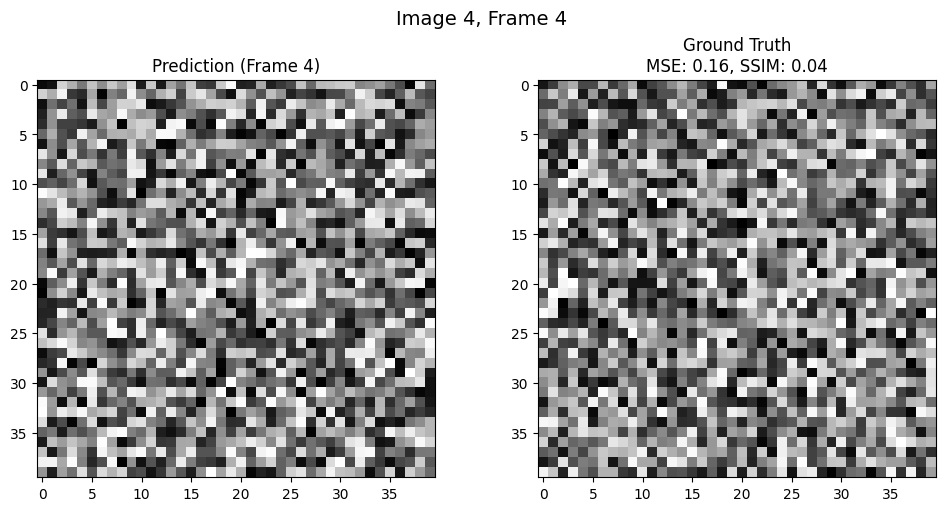

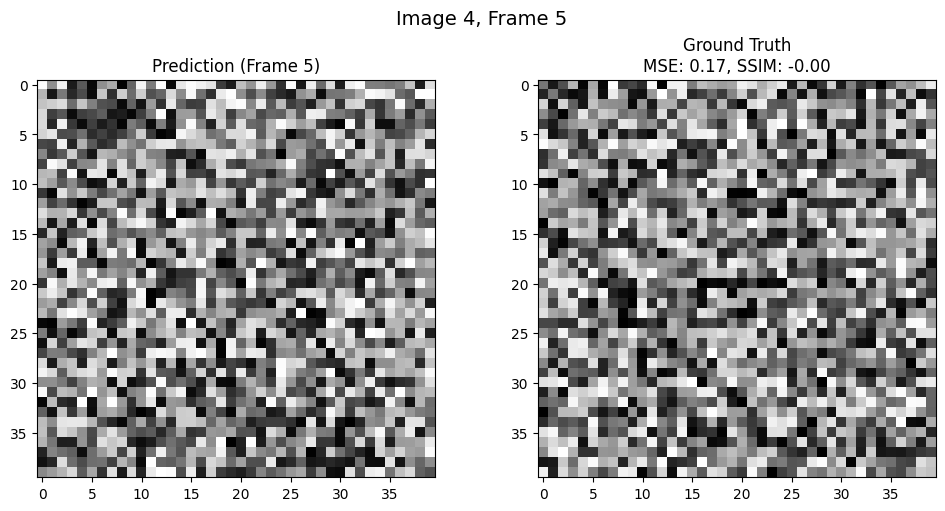

Comparing Image 5


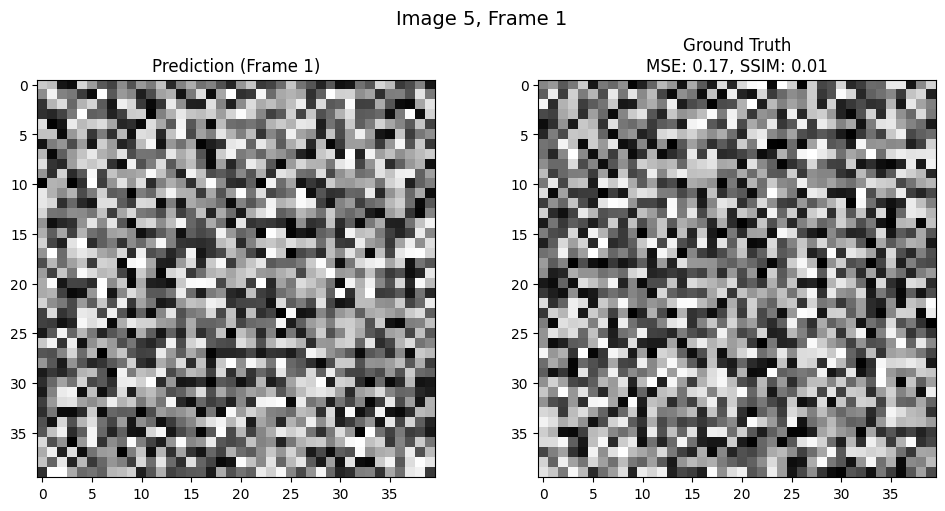

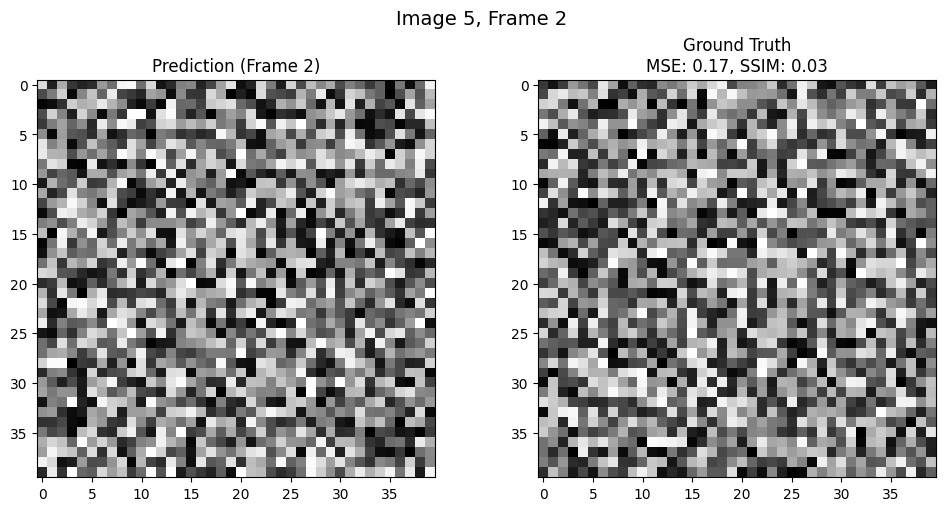

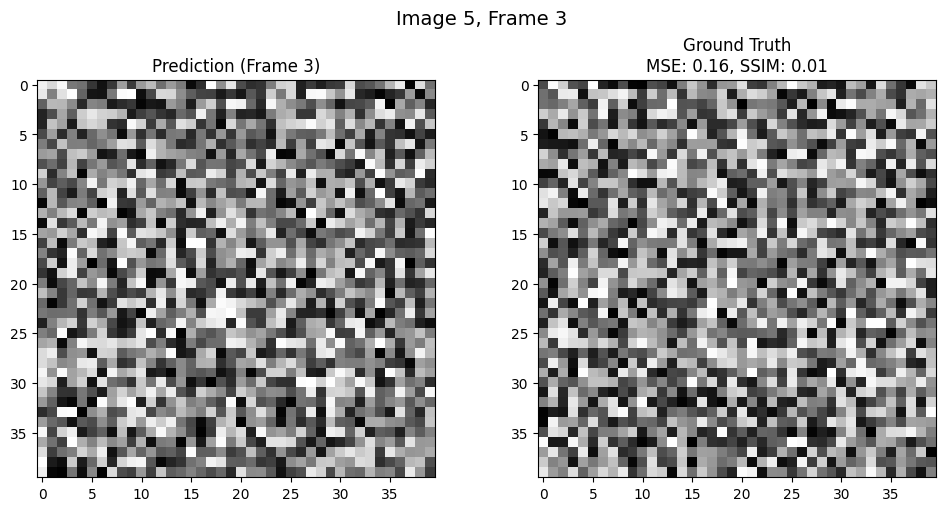

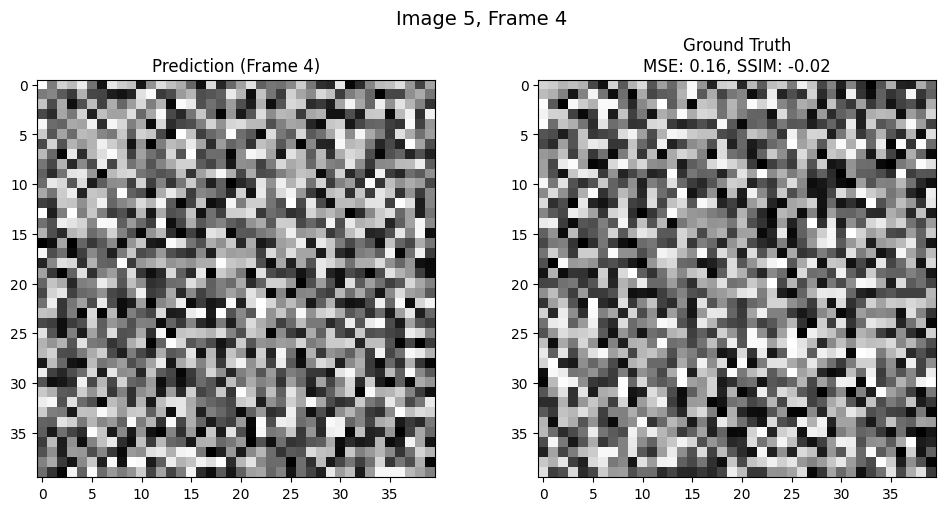

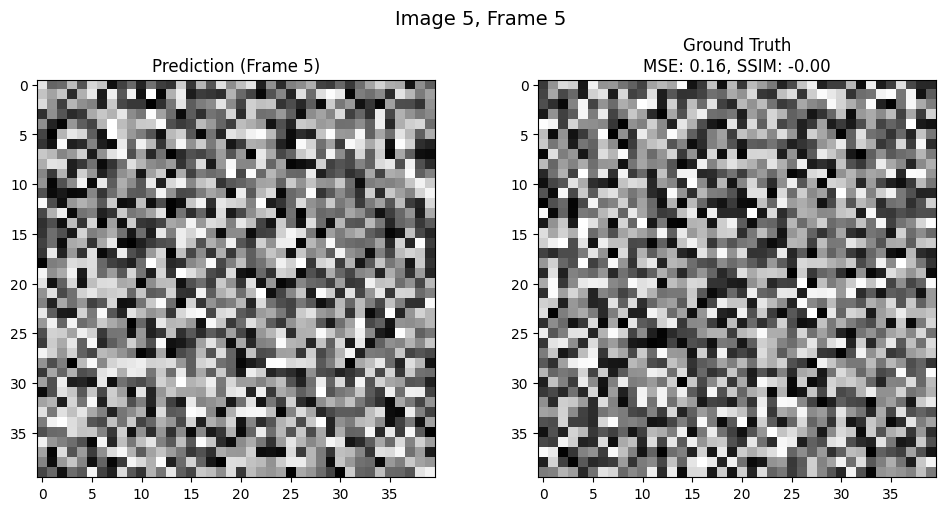

In [23]:
import numpy as np
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error as mse
import matplotlib.pyplot as plt

def compare_multiple_frames(y_hat, y_truth):
    """
    Compare predictions and ground truth for up to 5 images.
    Computes and displays MSE and SSIM for each frame.

    Parameters:
    y_hat (numpy.ndarray): Predicted data of shape (samples, frames, height, width).
    y_truth (numpy.ndarray): Ground truth data of shape (samples, frames, height, width).
    """
    n_images = min(5, y_hat.shape[0])  # Limit to 5 images
    n_frames = min(5, y_hat.shape[1])  # Limit to 5 frames per image

    for img_idx in range(n_images):
        print(f"Comparing Image {img_idx + 1}")
        for frame_idx in range(n_frames):
            # Extract the predicted and ground truth frames
            frameA = y_hat[img_idx, frame_idx, :, :]
            frameB = y_truth[img_idx, frame_idx, :, :]
            
            # Compute MSE and SSIM
            m = mse(frameA, frameB)
            s = ssim(frameA, frameB, data_range=frameB.max() - frameB.min())
            
            # Plot frames and display metrics
            fig, axs = plt.subplots(1, 2, figsize=(10, 5), constrained_layout=True)
            axs[0].imshow(frameA, cmap="gray")
            axs[0].set_title(f"Prediction (Frame {frame_idx + 1})")
            axs[1].imshow(frameB, cmap="gray")
            axs[1].set_title(f"Ground Truth\nMSE: {m:.2f}, SSIM: {s:.2f}")
            plt.suptitle(f"Image {img_idx + 1}, Frame {frame_idx + 1}", fontsize=14)
            plt.show()

# Example Usage
# Simulating 5 images, 5 frames, and images of size 40x40
y_hat = np.random.rand(5, 5, 40, 40)  # Predicted frames
y_truth = np.random.rand(5, 5, 40, 40)  # Ground truth frames

# Compare frames
compare_multiple_frames(y_hat, y_truth)

Comparing Image 1


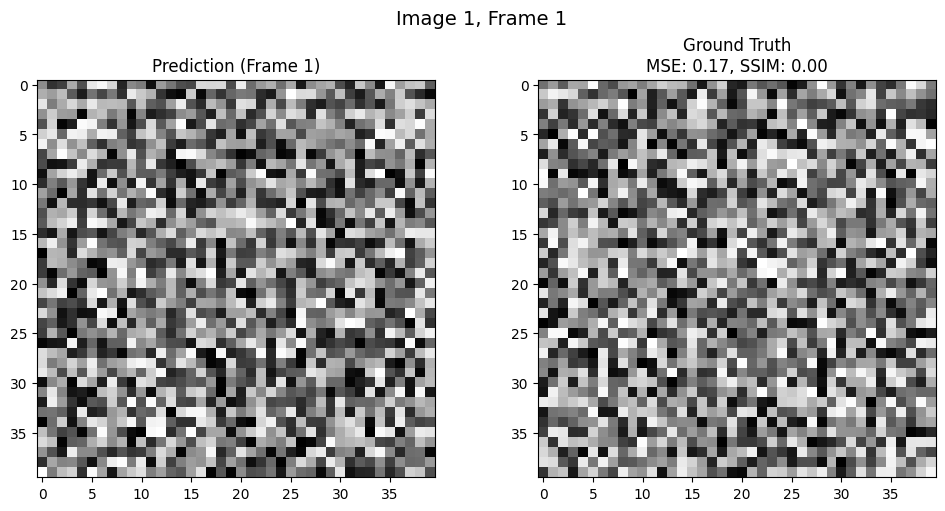

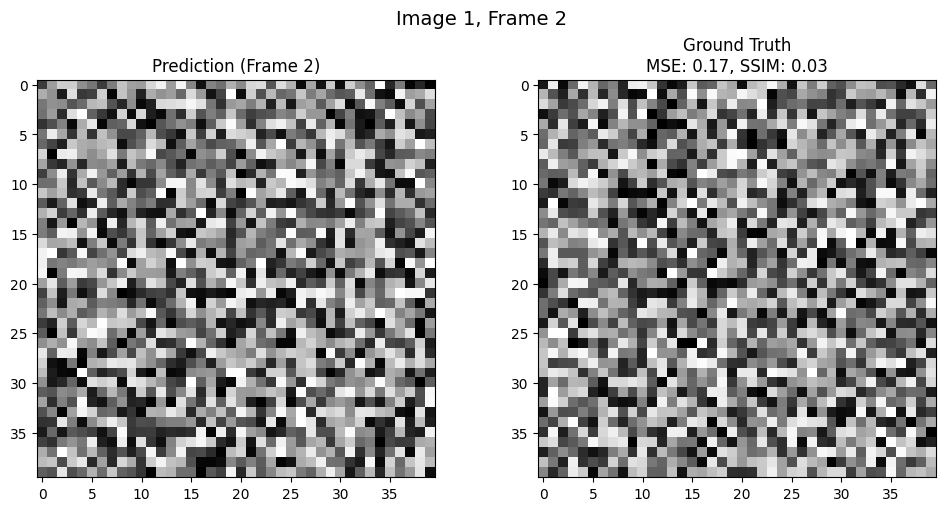

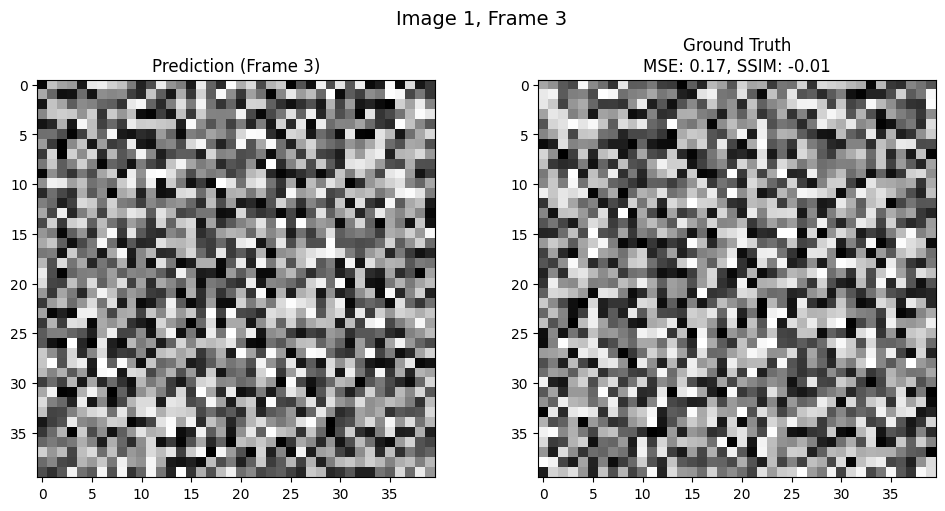

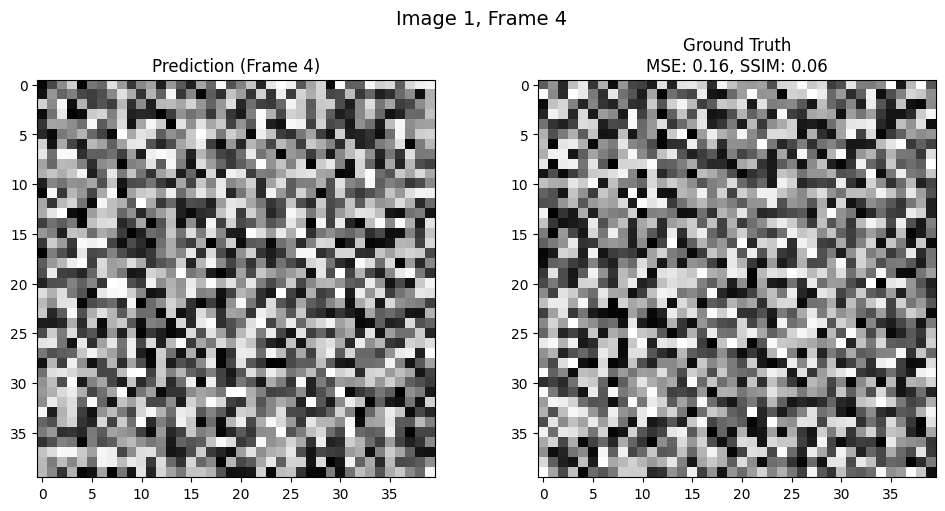

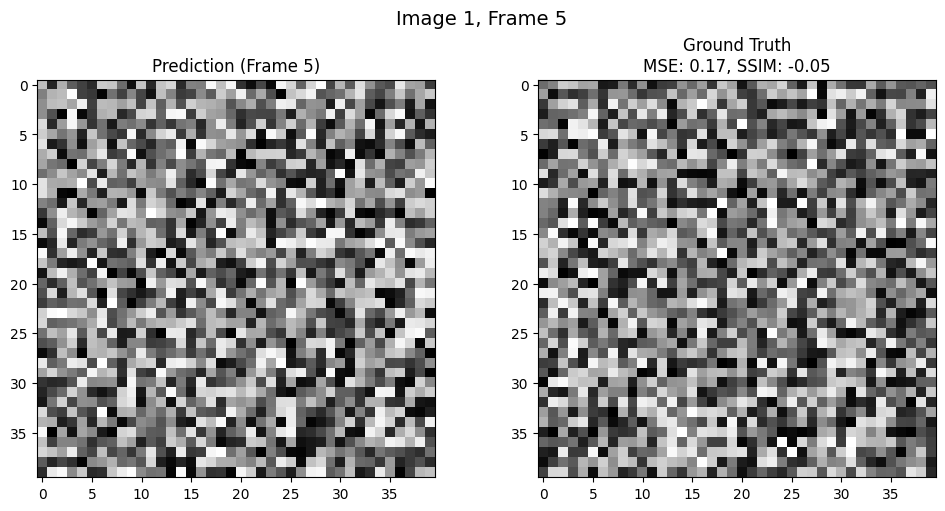

Comparing Image 2


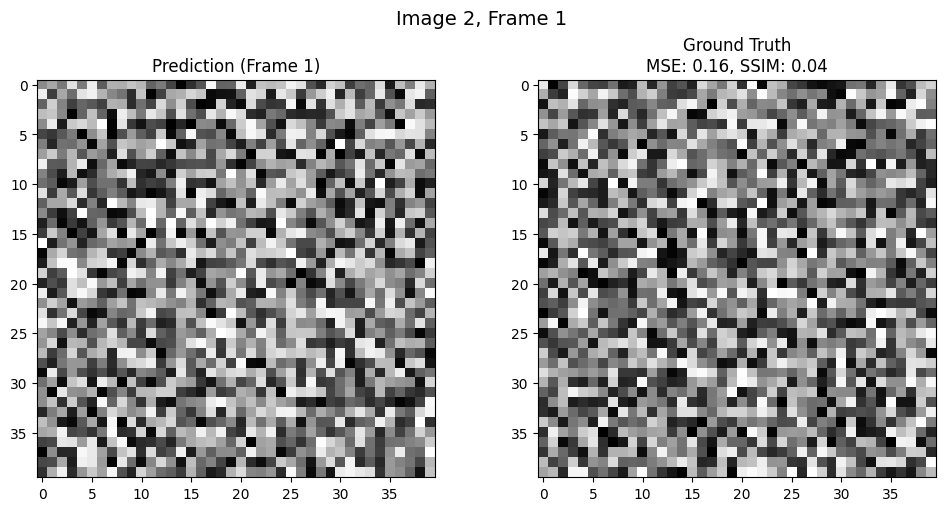

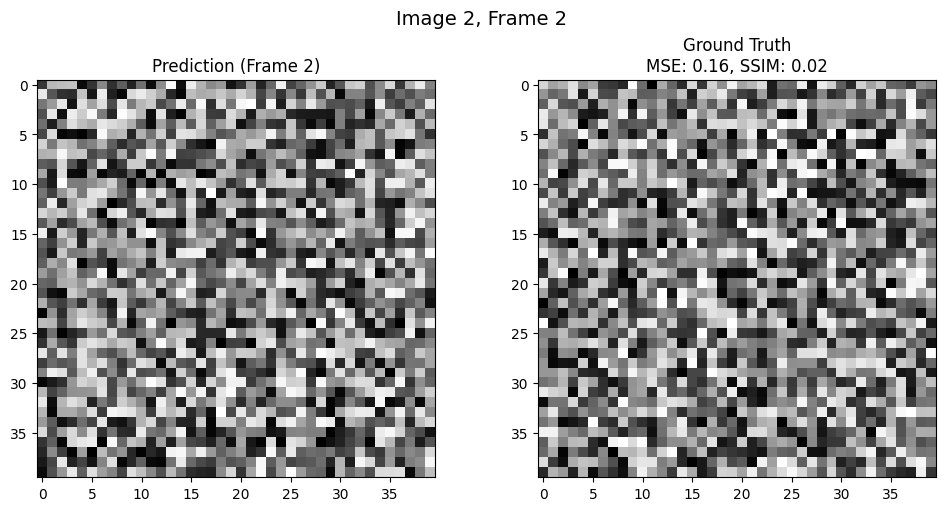

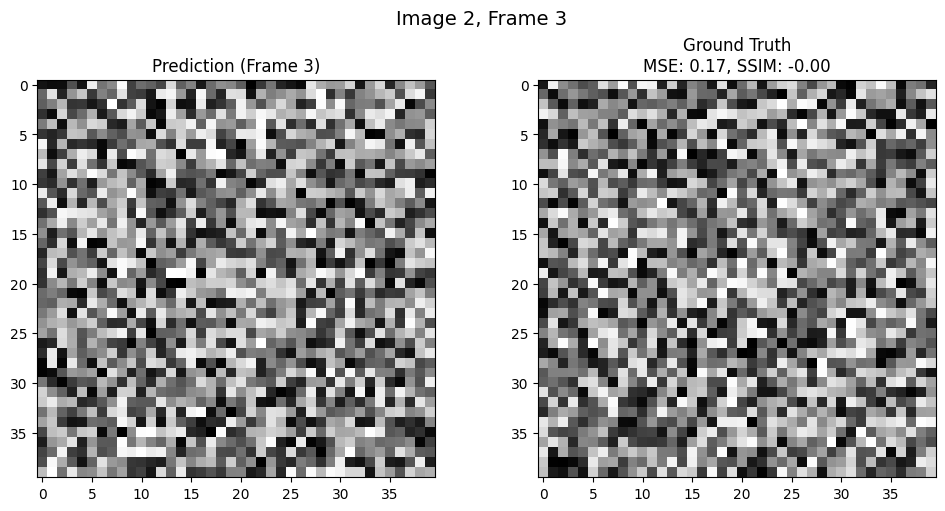

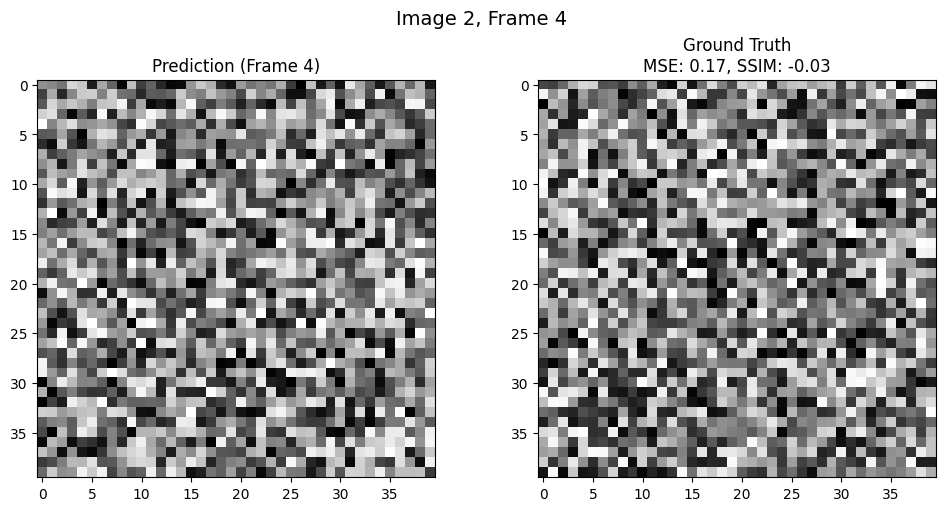

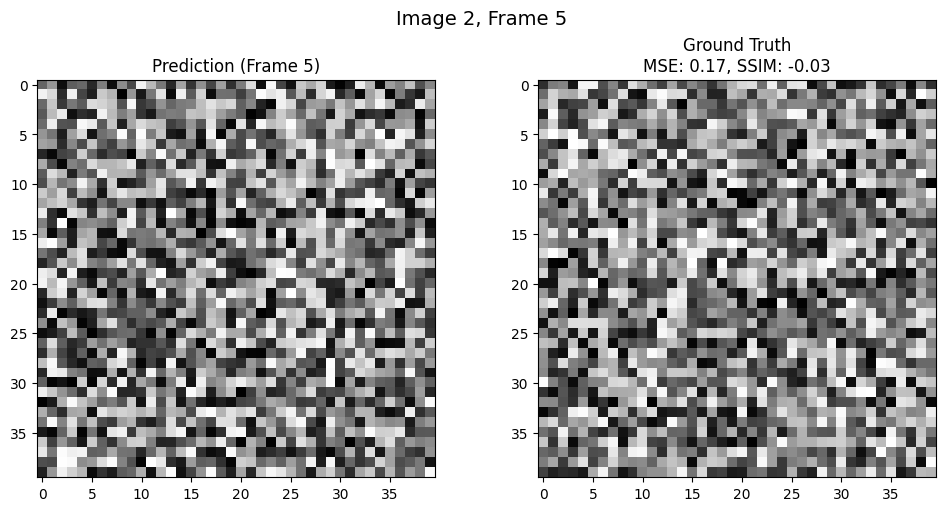

Comparing Image 3


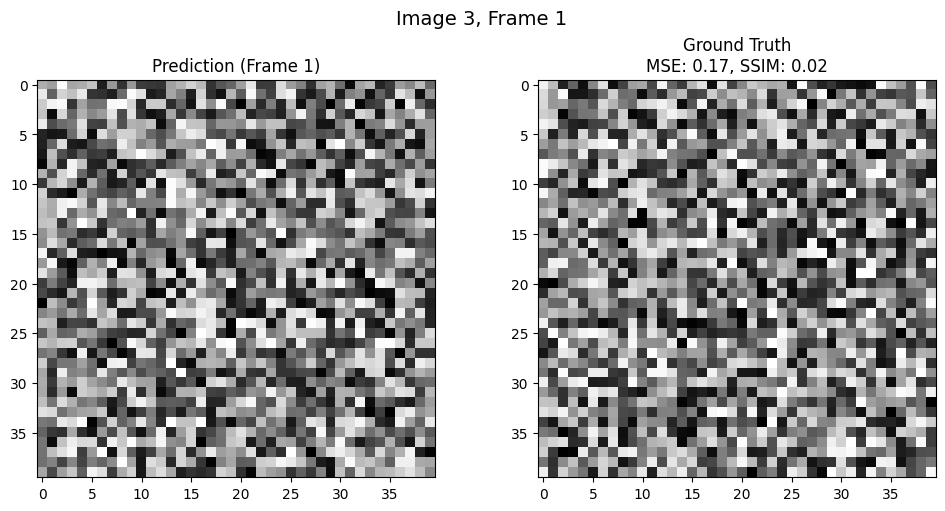

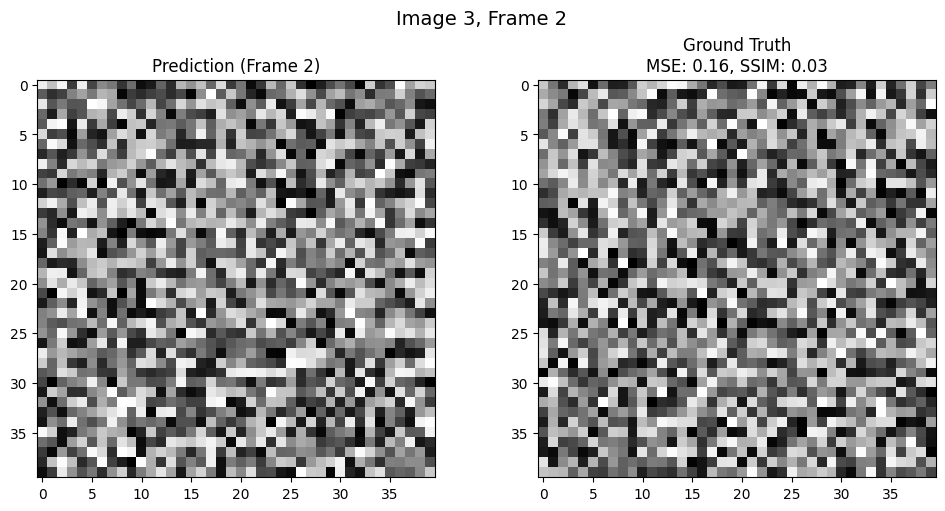

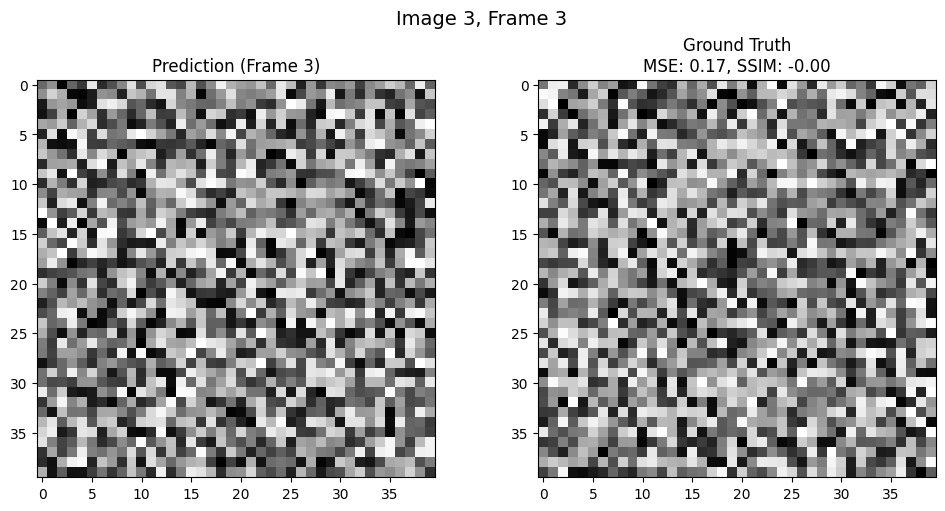

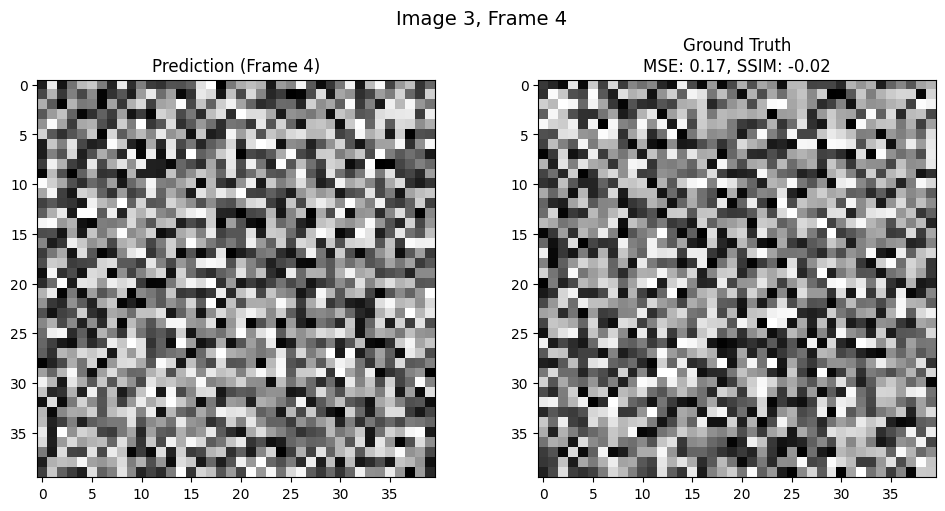

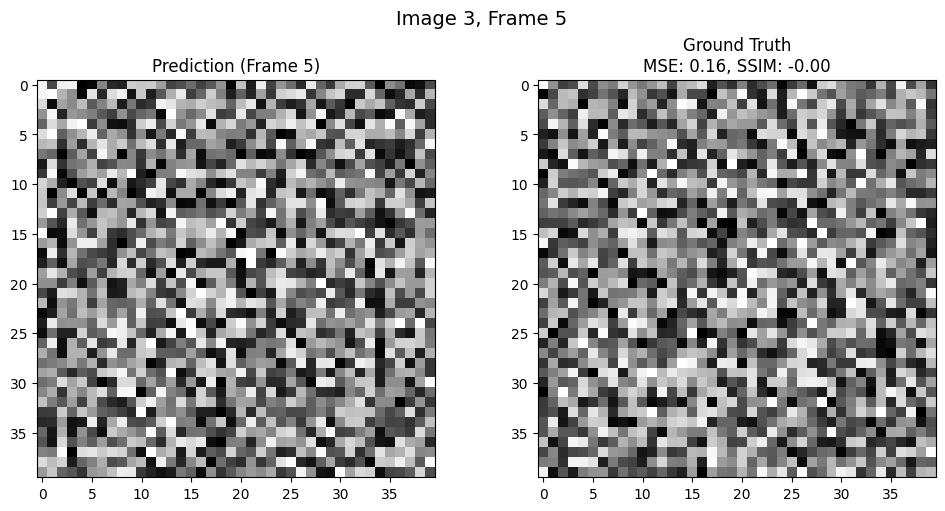

Comparing Image 4


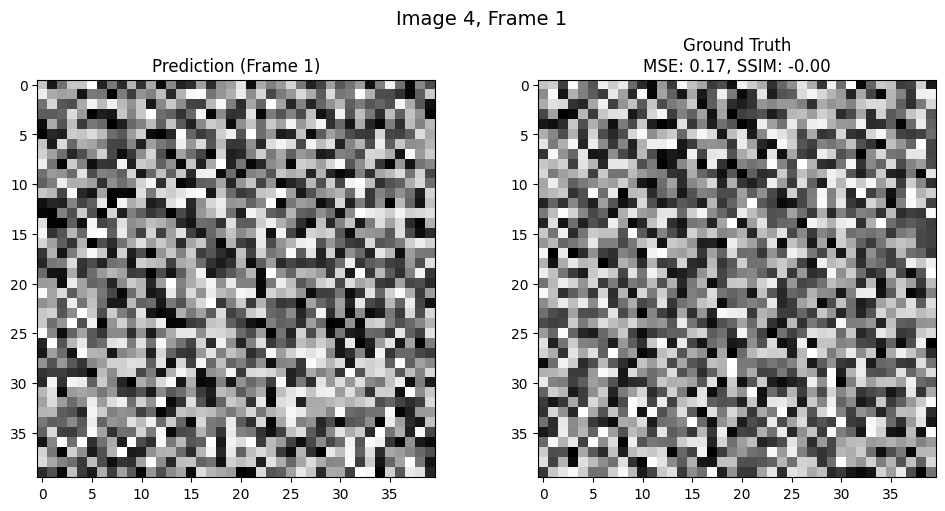

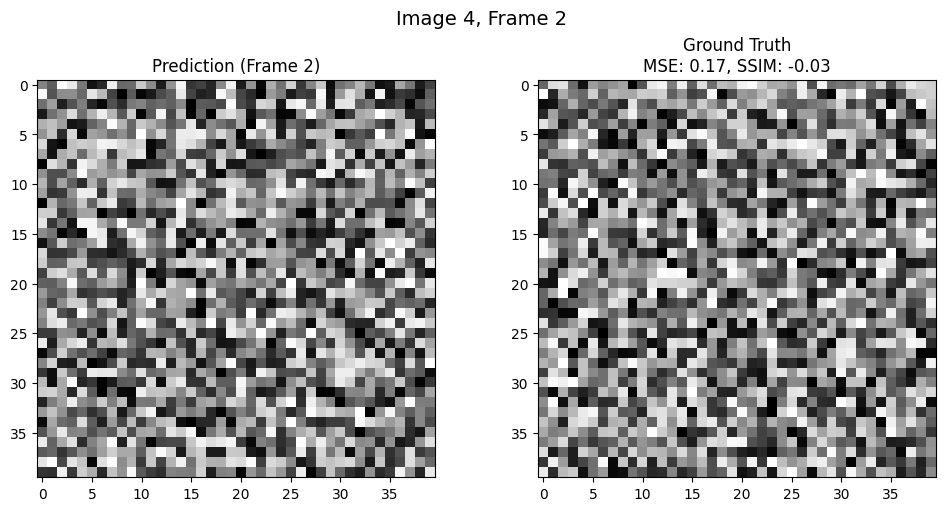

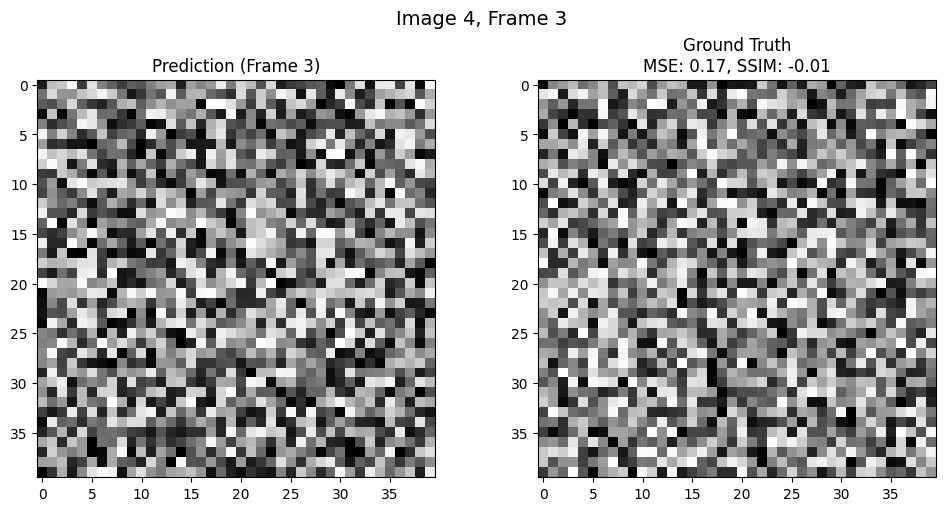

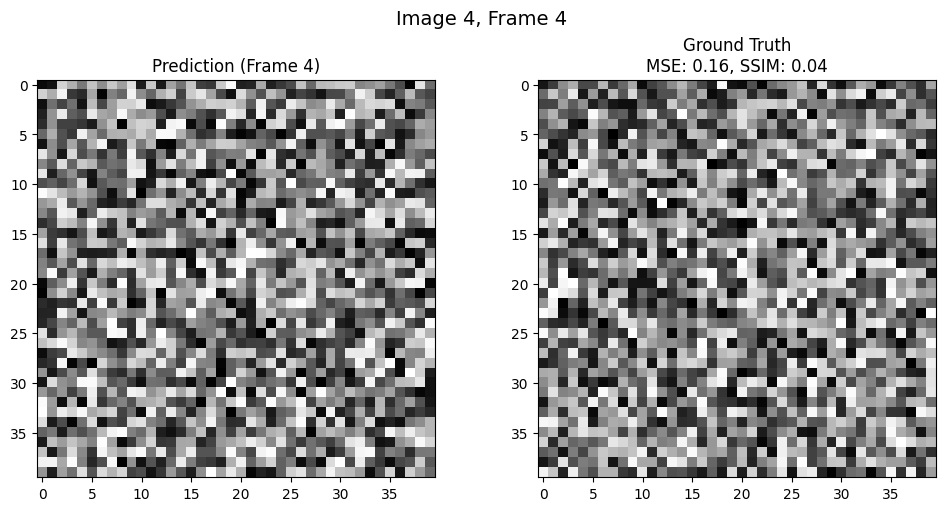

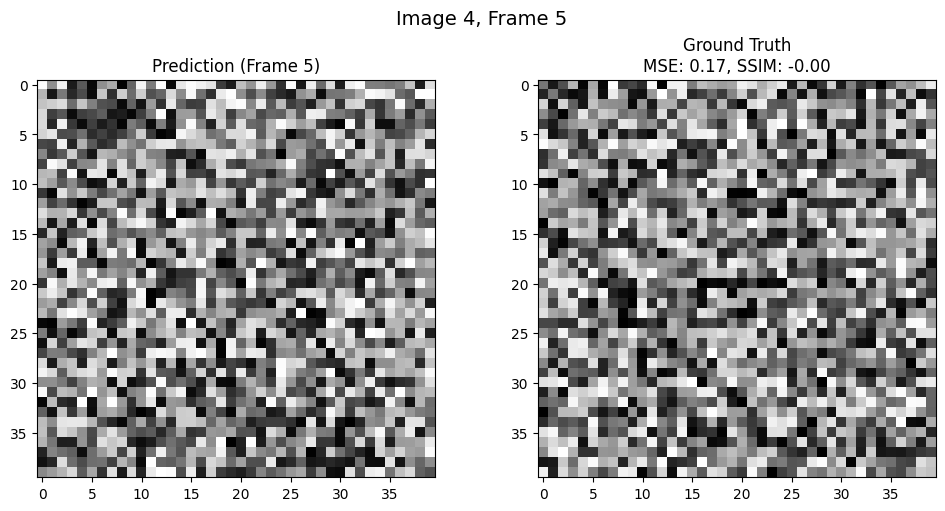

Comparing Image 5


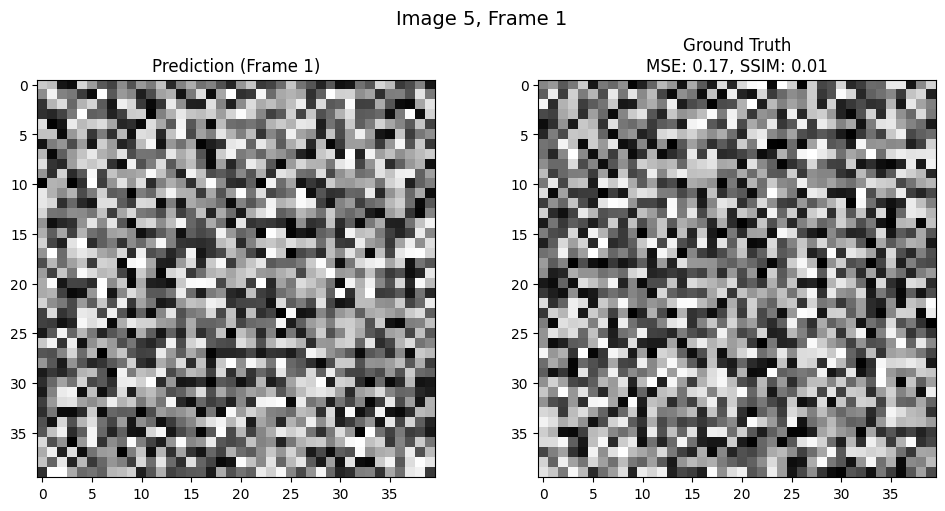

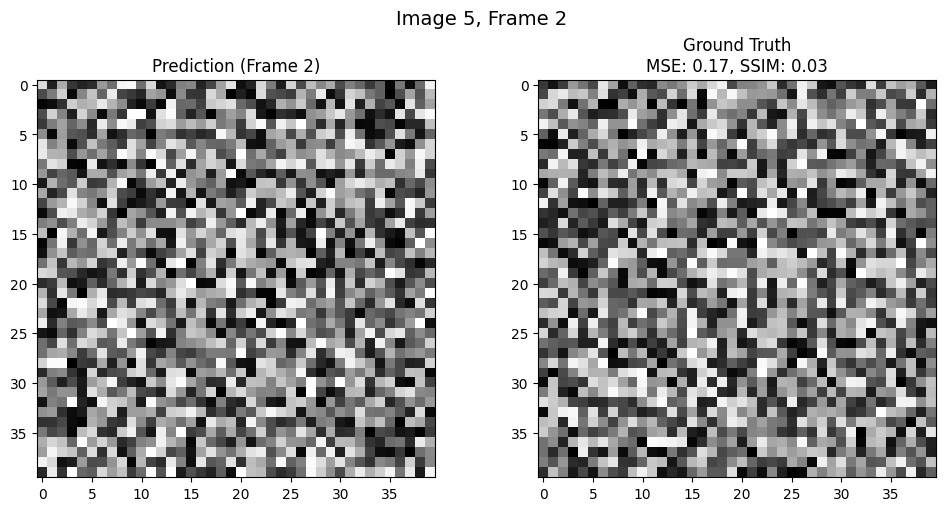

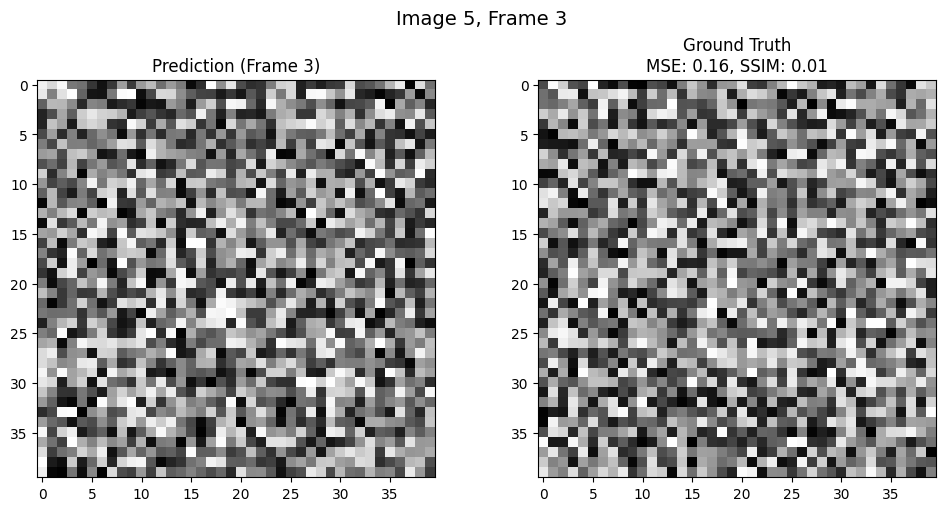

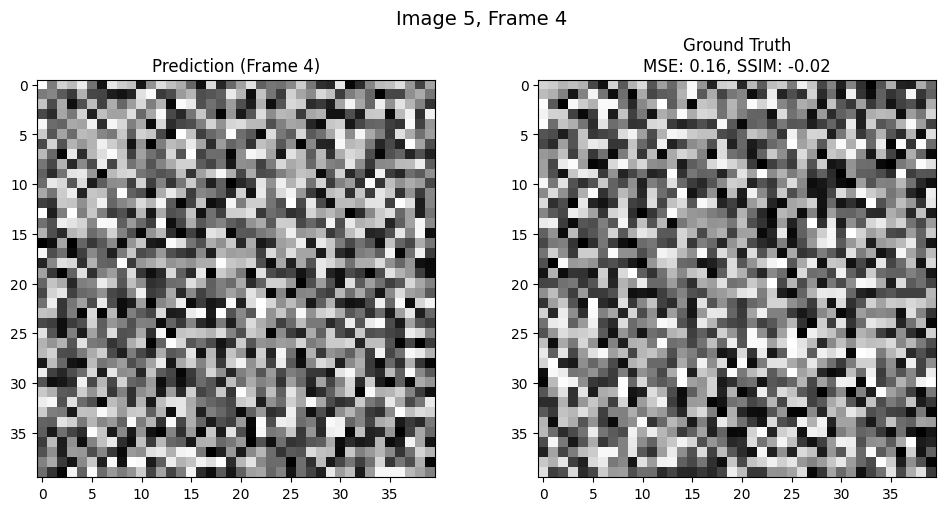

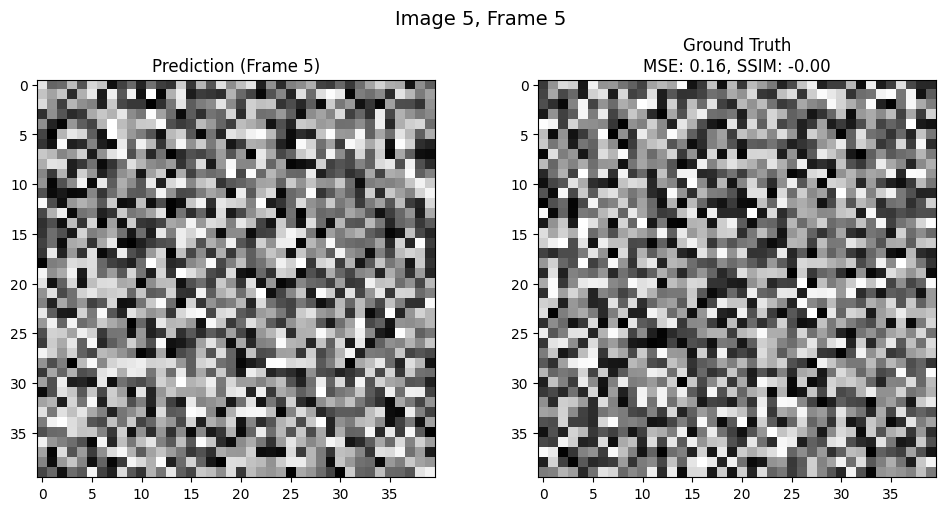

In [24]:
# Compare predictions and ground truth
compare_multiple_frames(y_hat, y_truth)

In [25]:
#Y_hat[5,0,:,:,:].mean()

In [26]:
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error as mse
import matplotlib.pyplot as plt

def compare_multiple_samples(predicted, ground_truth, n_samples=5):
    """
    Compare multiple samples (images) with their corresponding frames (predicted vs. ground truth).
    
    Parameters:
    predicted (numpy.ndarray): Predicted data of shape (samples, frames, height, width).
    ground_truth (numpy.ndarray): Ground truth data of shape (samples, frames, height, width).
    n_samples (int): Number of images to compare (default 5).
    """
    n_samples = min(n_samples, predicted.shape[0])  # Ensure it compares only available samples (up to 5)
    
    for sample_idx in range(n_samples):
        fig, axs = plt.subplots(5, 2, sharey=True, sharex=True, figsize=(20, 20))
        fig.tight_layout()
        
        sample_m = 0  # To accumulate MSE
        sample_s = 0  # To accumulate SSIM
        
        for frame in range(5):  # Iterate through 5 frames
            frameA = predicted[sample_idx, frame, :, :]
            frameB = ground_truth[sample_idx, frame, :, :]
            
            # Compute MSE
            m = mse(frameA, frameB)
            
            # Compute SSIM with explicit data_range
            s = ssim(frameA, frameB, data_range=frameB.max() - frameB.min())
            
            sample_m += m / 5.0  # Average MSE
            sample_s += s / 5.0  # Average SSIM
            
            # Display the frames and their metrics
            axs[frame][0].imshow(frameA, cmap='gray')
            axs[frame][1].imshow(frameB, cmap="gray")
            axs[frame][0].set_title(f"Predicted Frame {frame + 1}")
            axs[frame][1].set_title(f"MSE: {m:.2f}, SSIM: {s:.2f}")
        
        # Add a title for the entire figure
        fig.suptitle(f"Sample {sample_idx + 1} Difference (5 Frames) \n MSE: {sample_m:.2f}, SSIM: {sample_s:.2f}")
        plt.show()

# Example Usage
# Simulating 5 images, 5 frames, and images of size 40x40
import numpy as np
predicted = np.random.rand(5, 5, 40, 40)  # Predicted frames
ground_truth = np.random.rand(5, 5, 40, 40)  # Ground truth frames

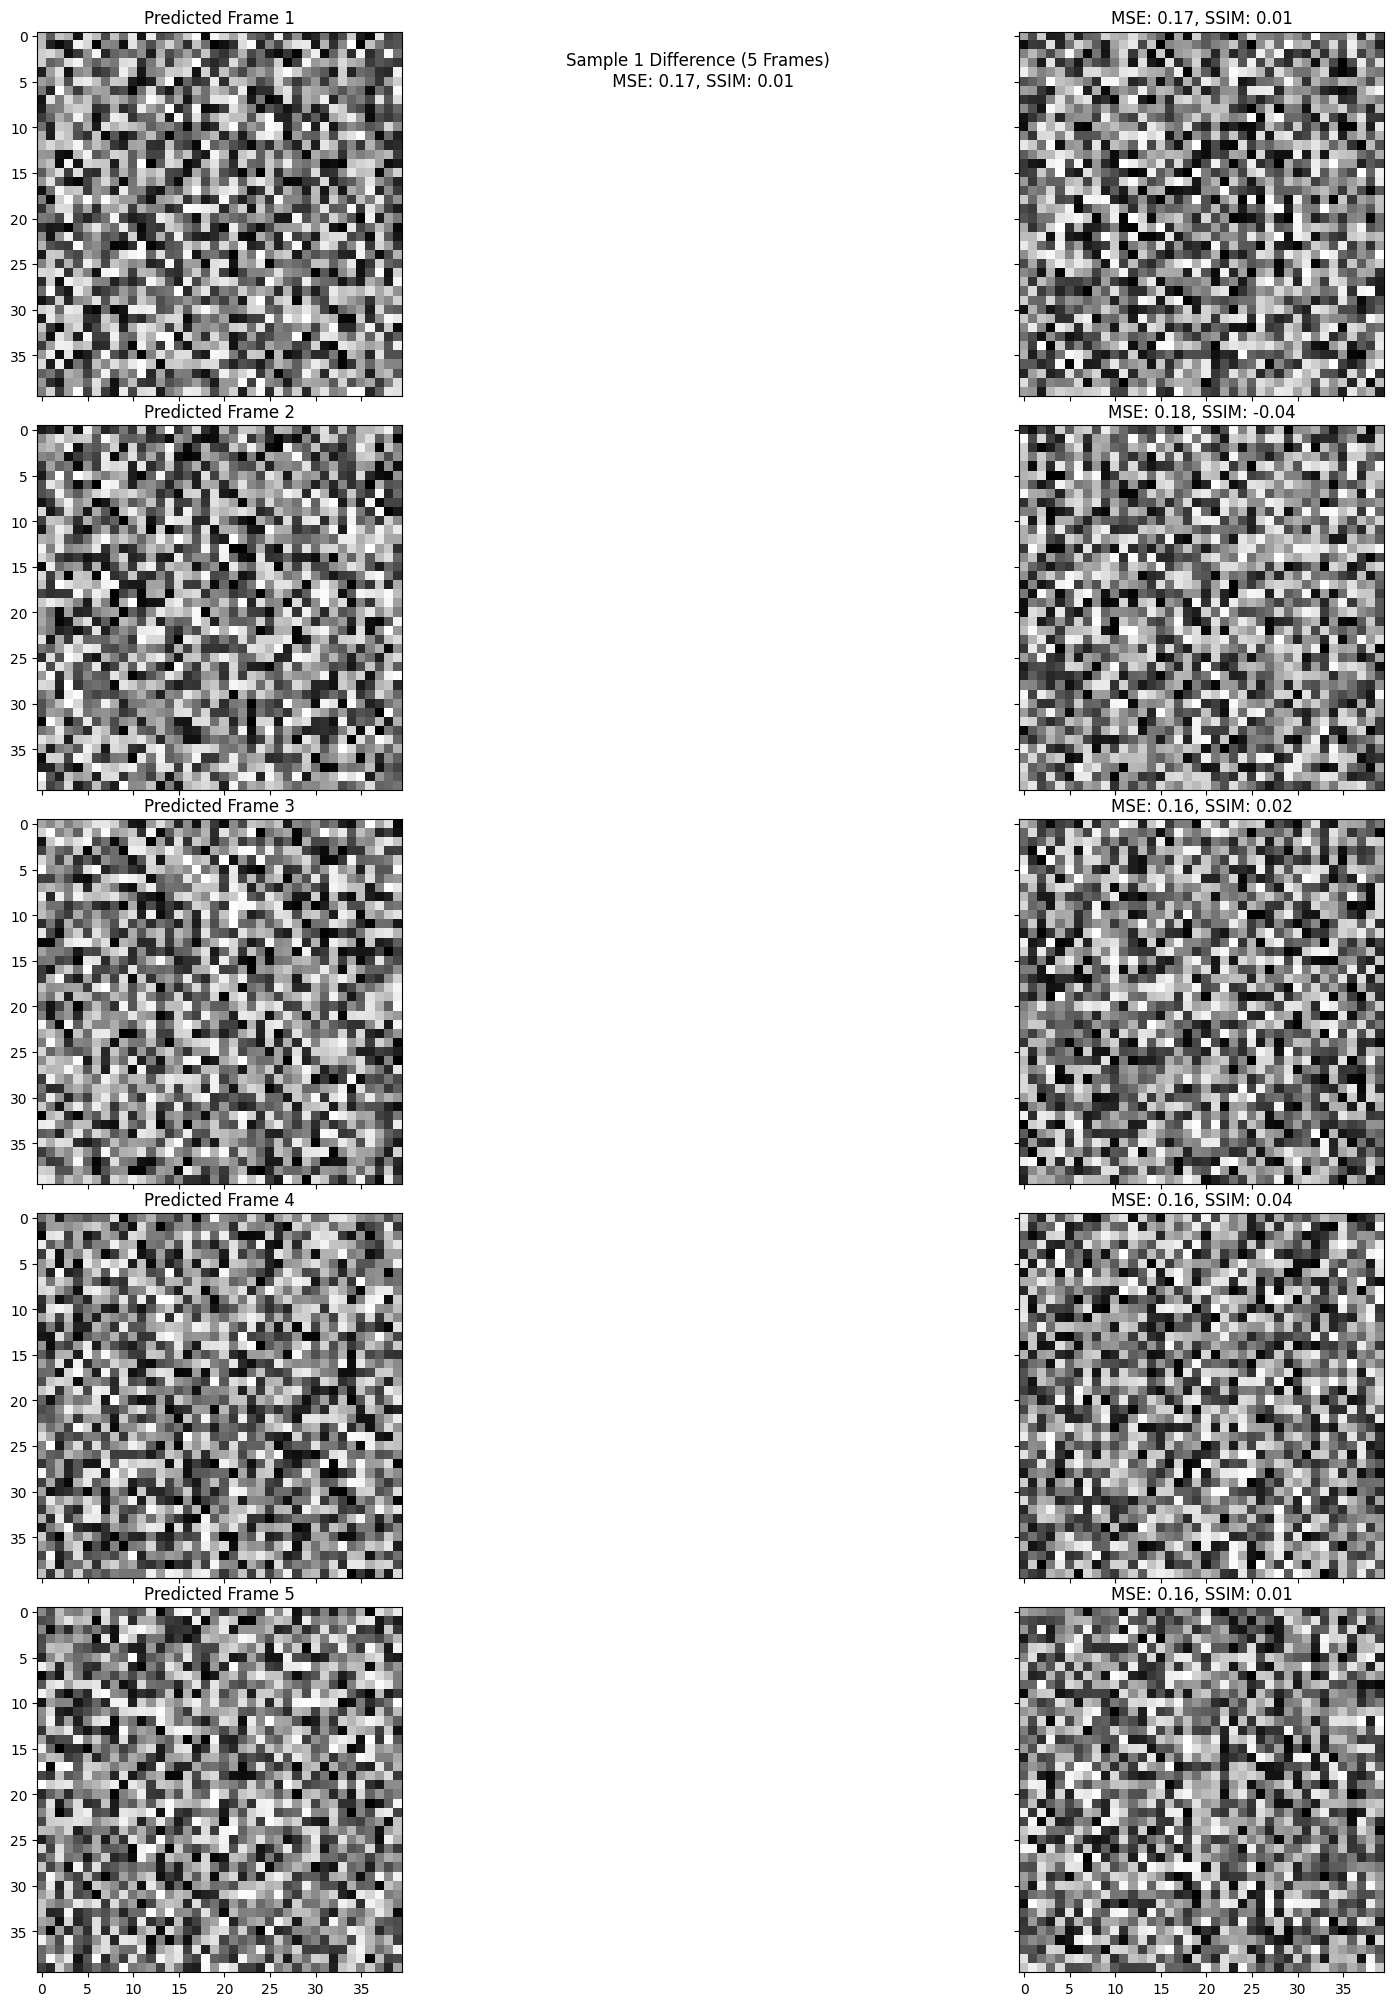

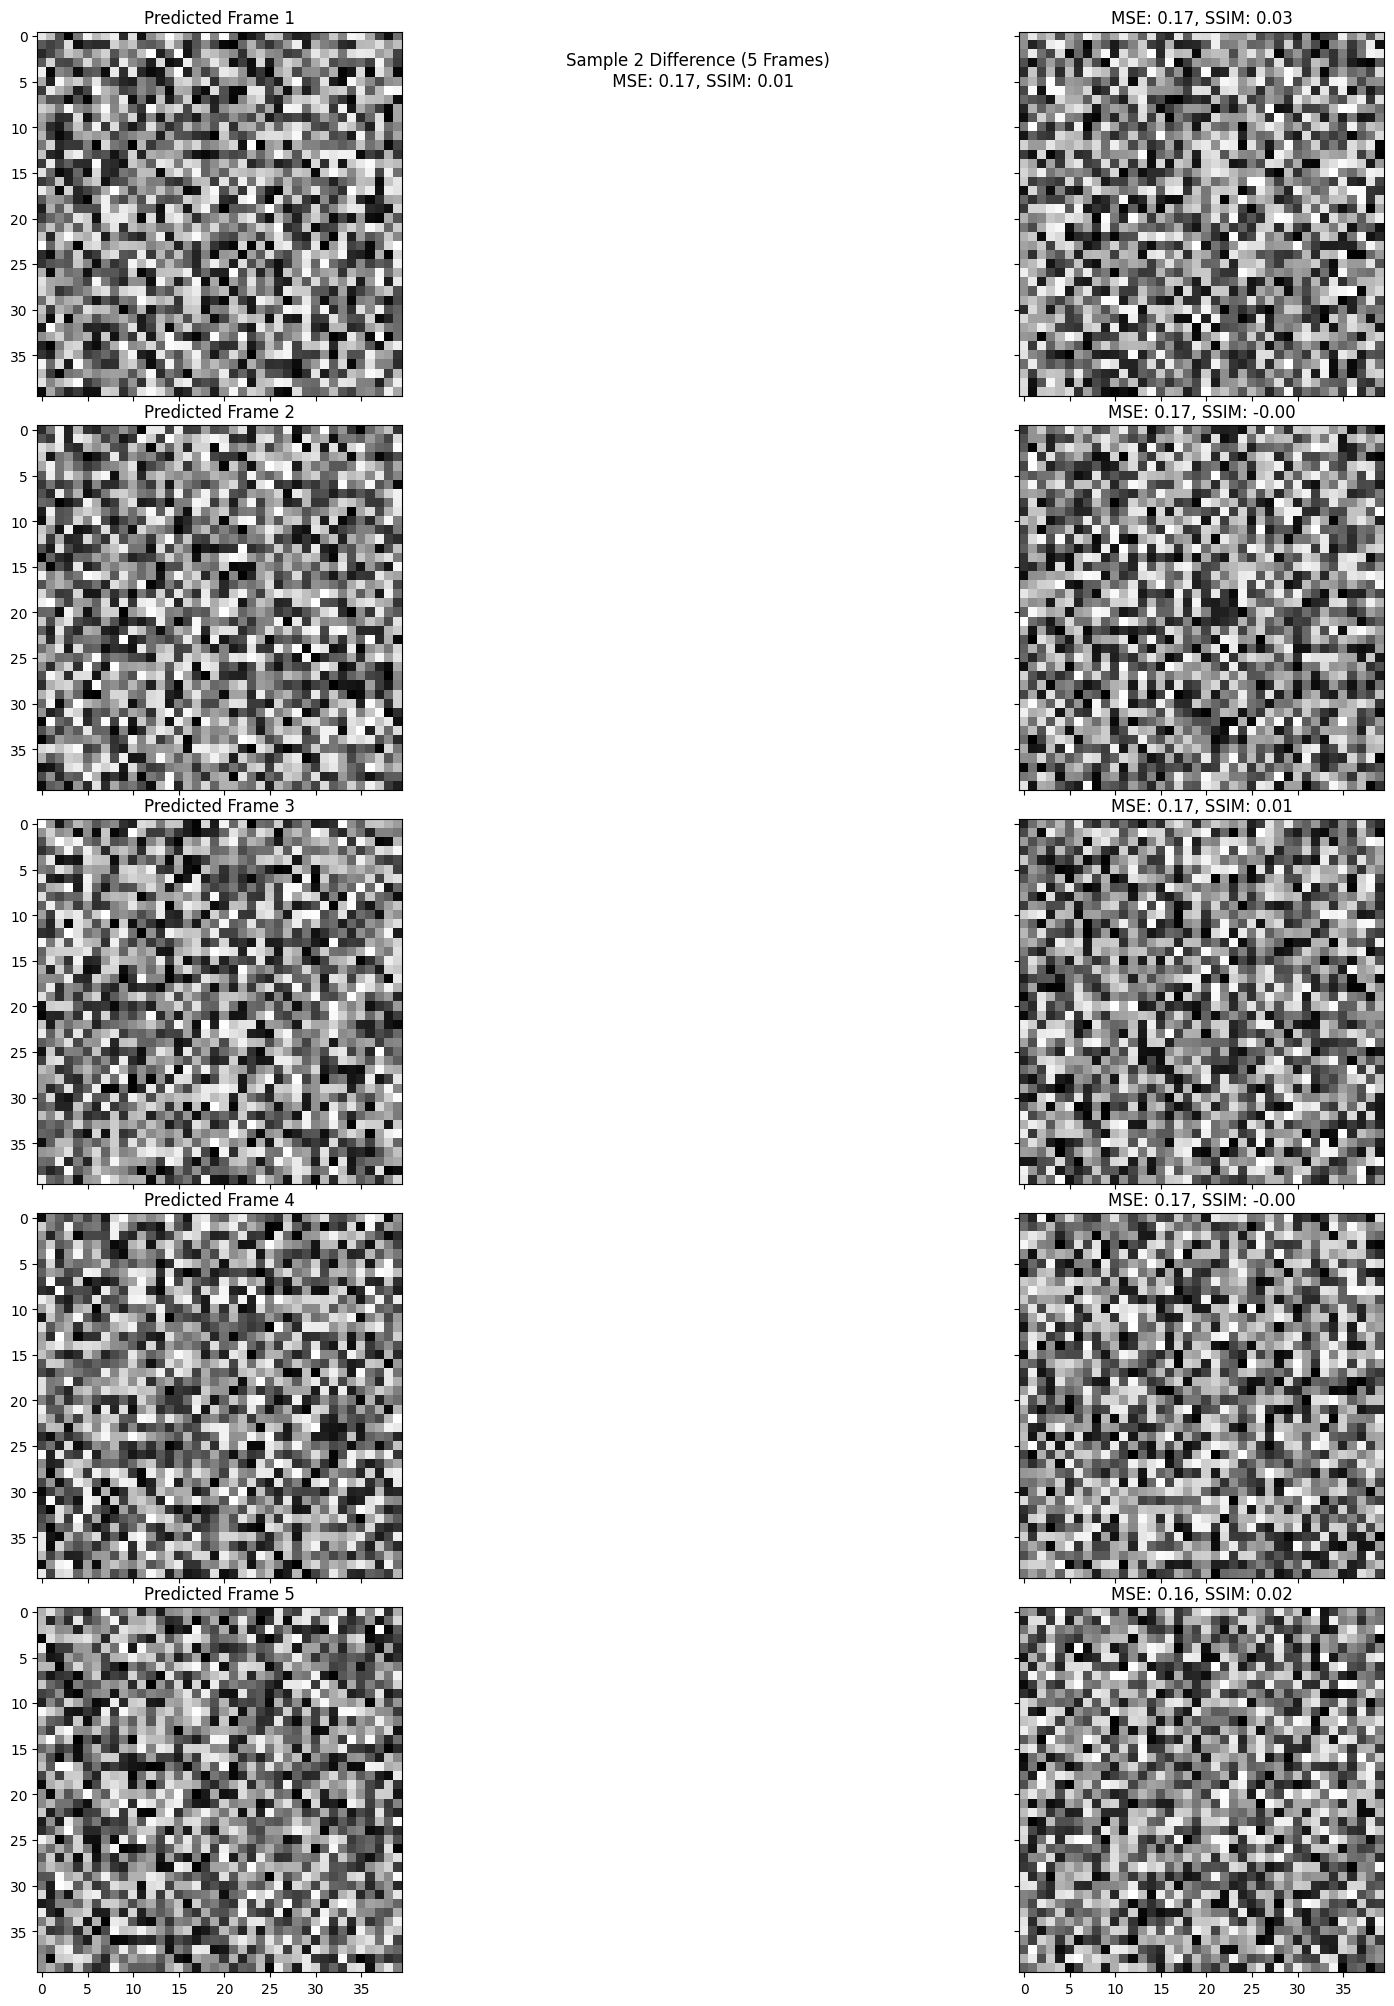

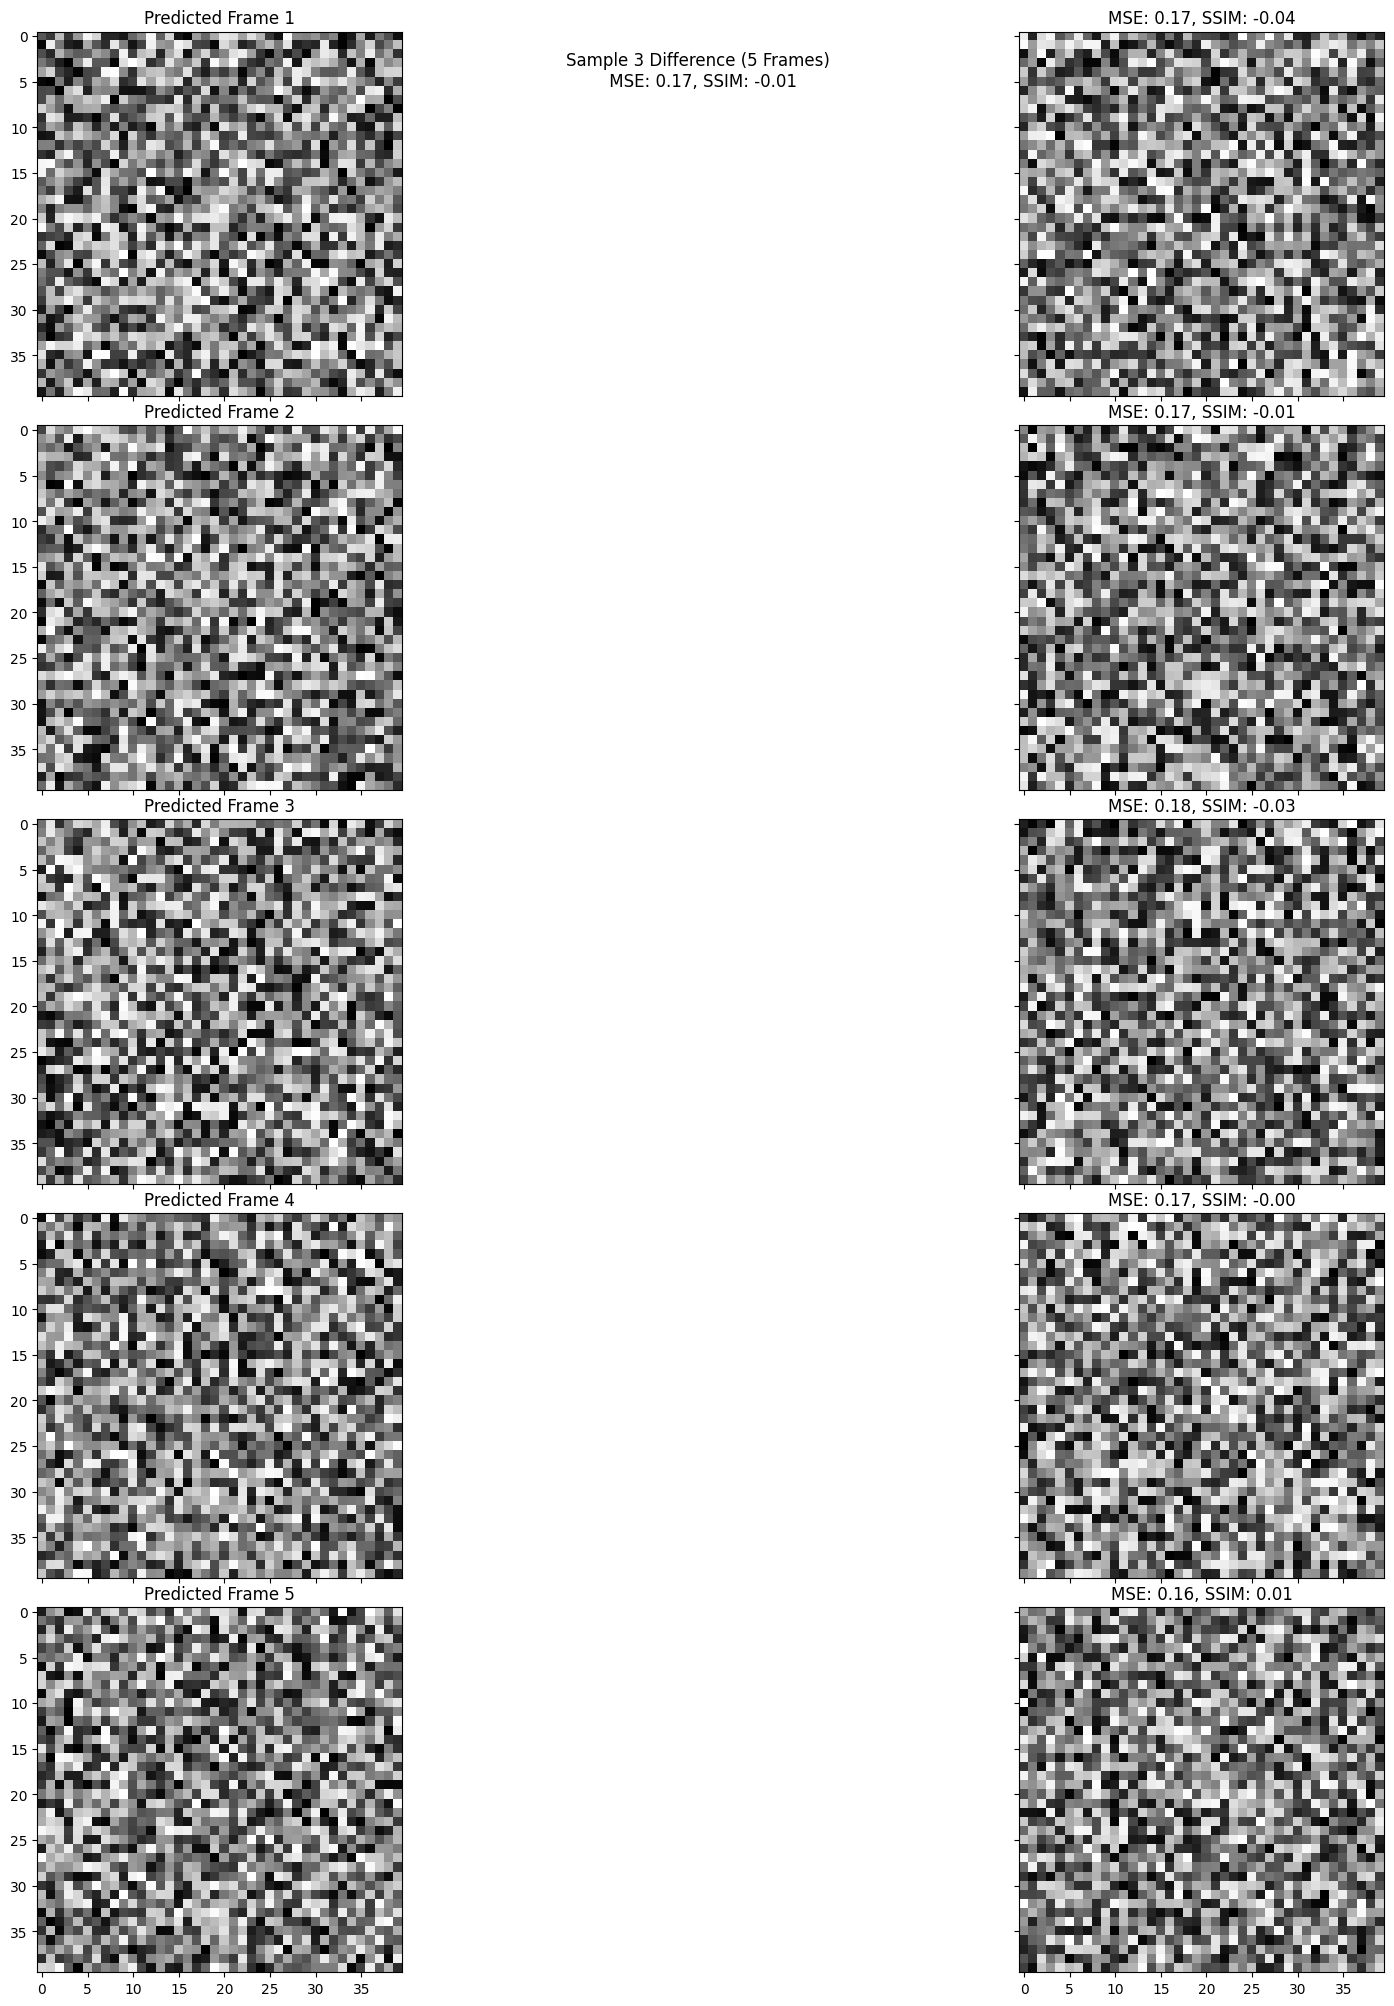

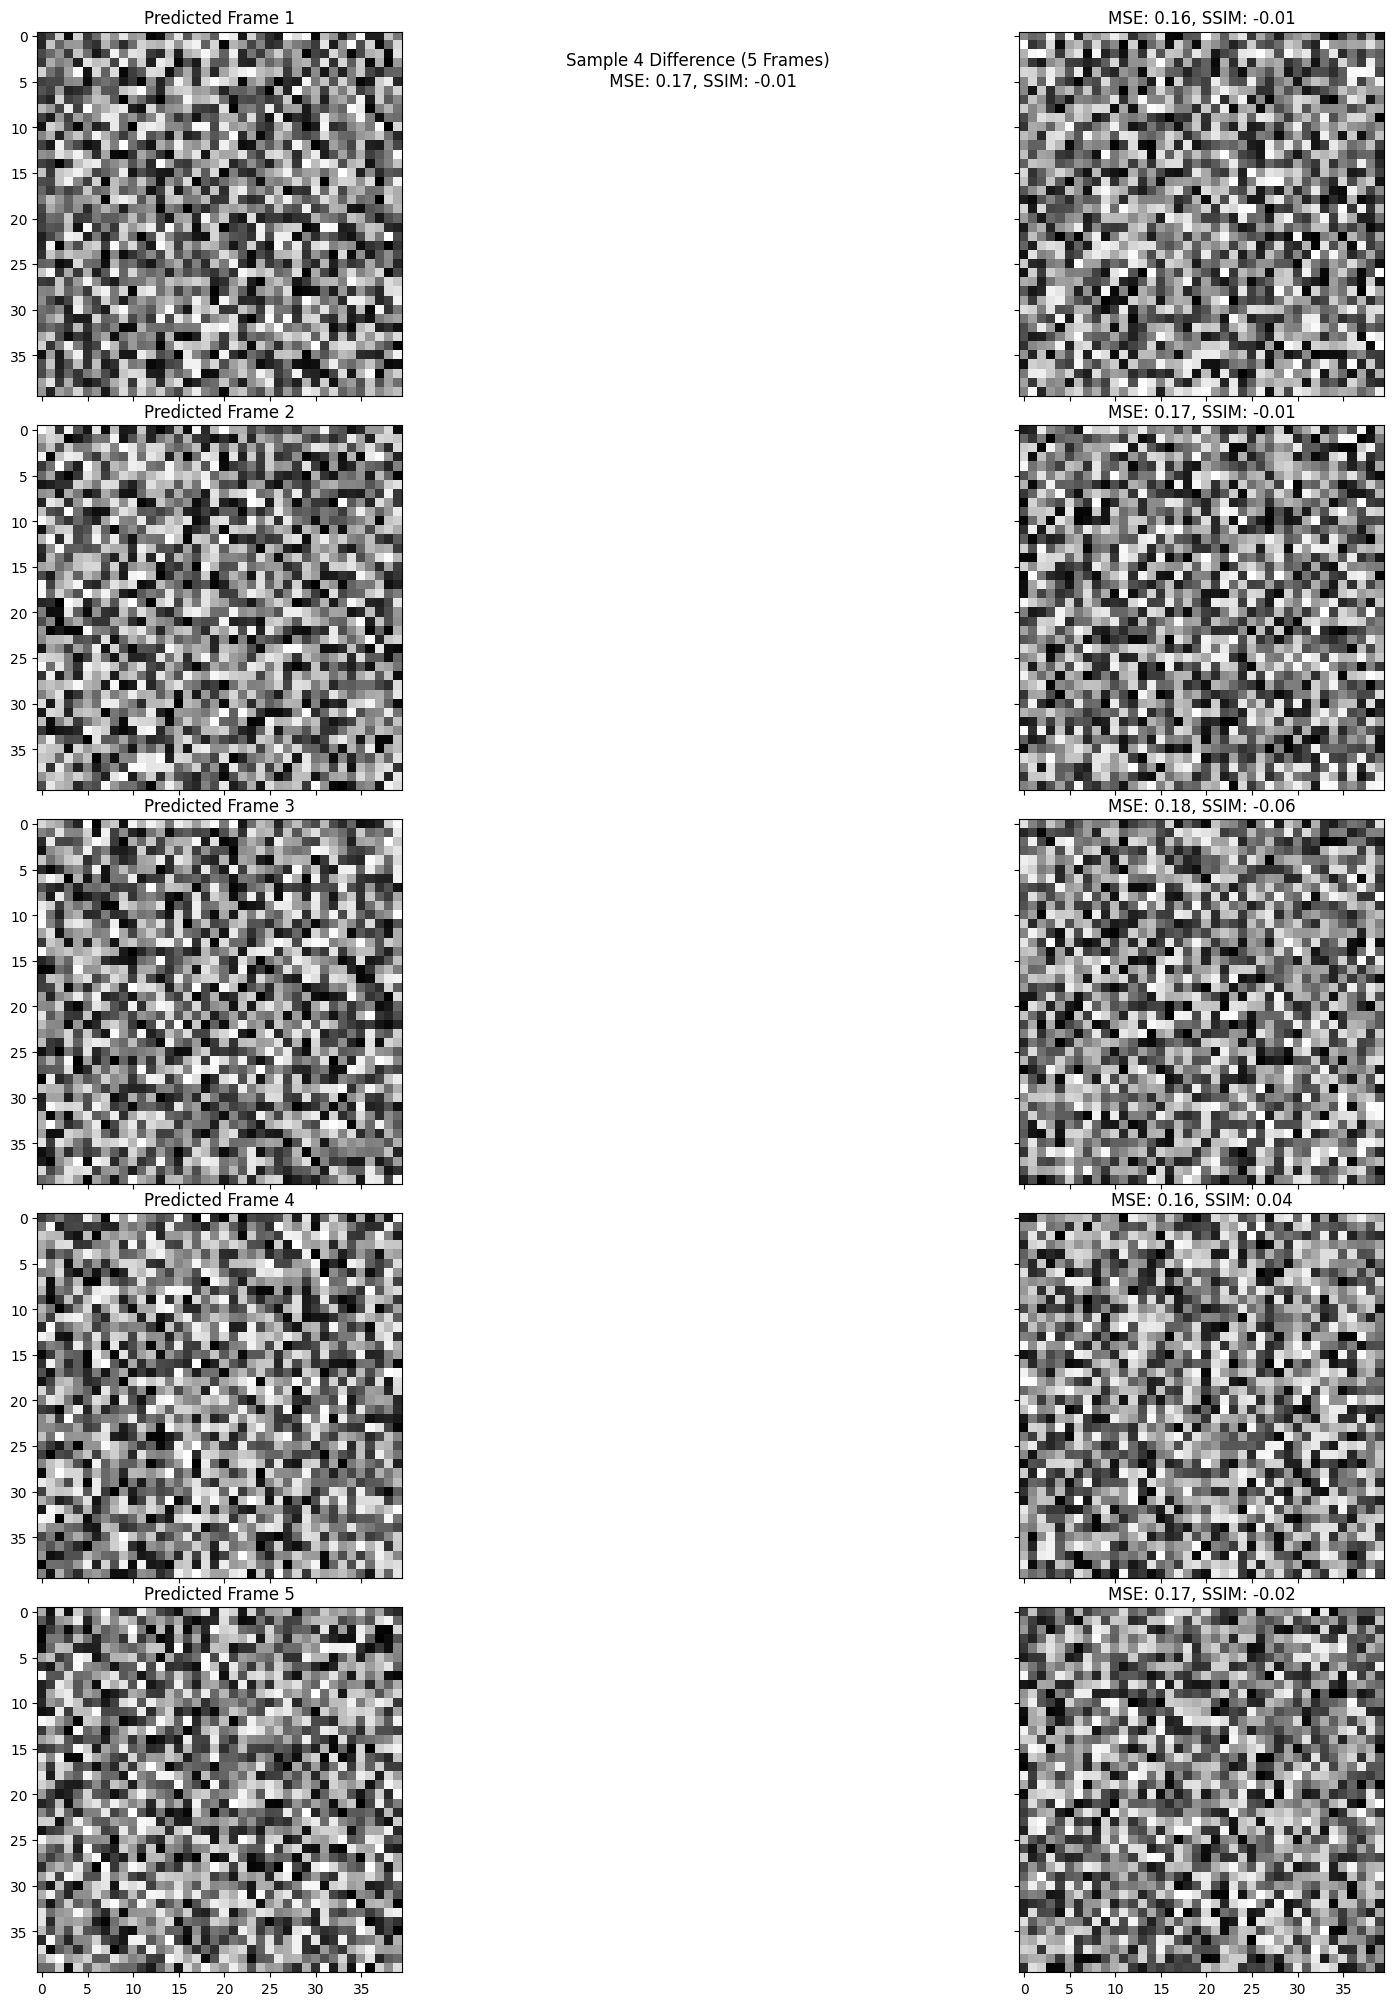

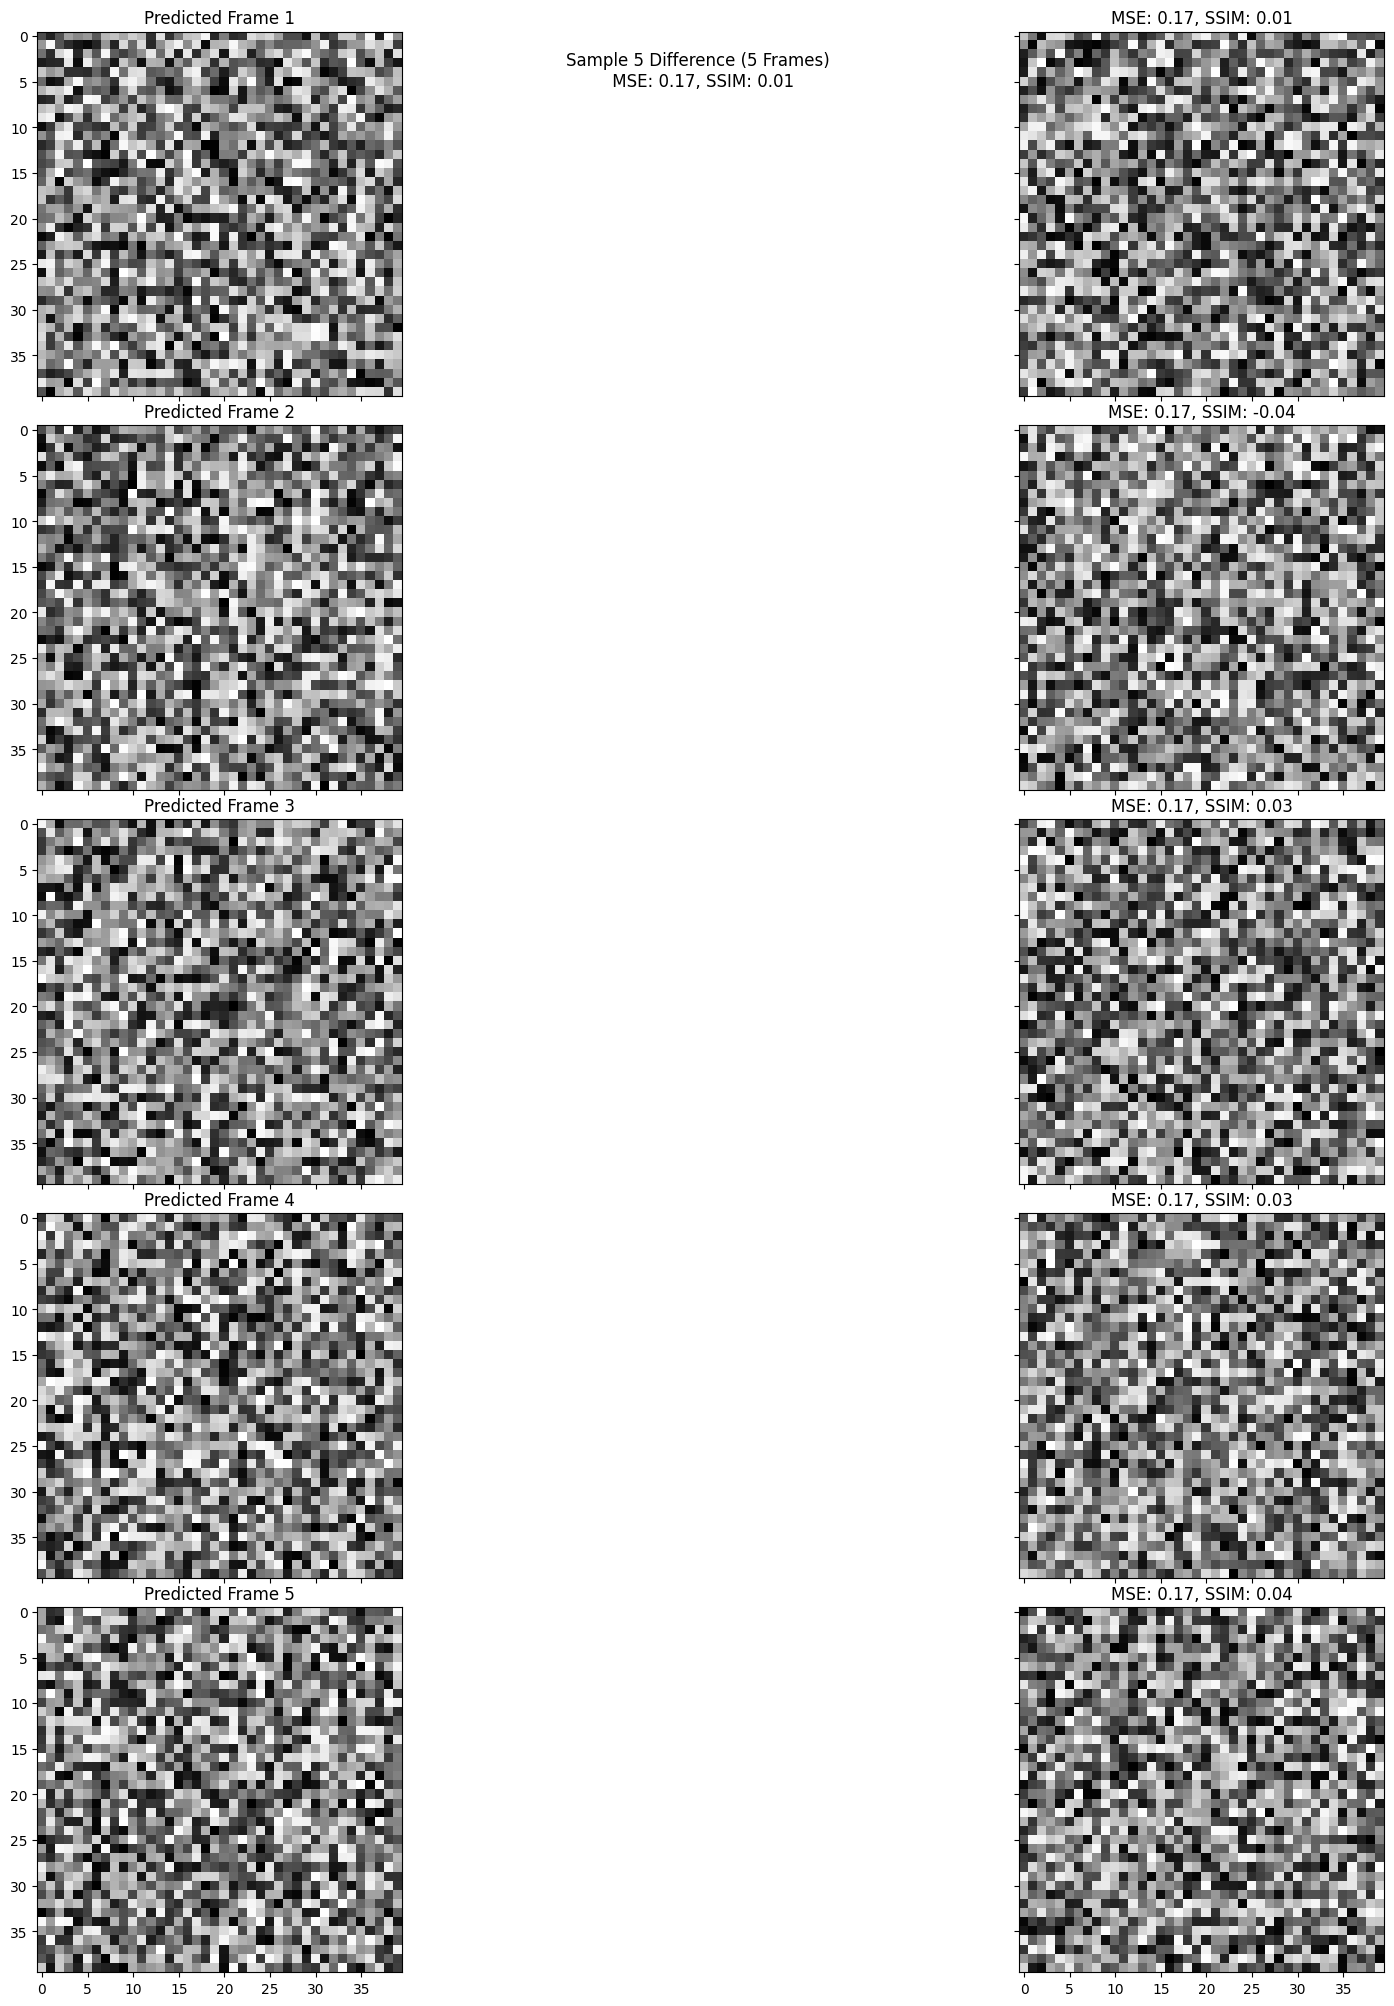

In [27]:
# Compare predictions and ground truth for 5 samples
compare_multiple_samples(predicted, ground_truth, n_samples=5)